# IF3270 Pembelajaran Mesin | Tugas Besar - Feedforward Neural Network

Group Members:
- Maximilian Sulistiyo (13522061)
- Marvel Pangondian (13522075)
- Abdullah Mubarak (13522101)

In this project, we implement a custom built Feedforward Neural Network with no high-level libraries. The goal in this project is to be able to create a custom FFNN that is able to specify the type of activation function on each layer, the type of loss function, and how many neurons in each layer. We will also compare our algorithm with other built in algorithm (the sklearn MLP)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from ann import NeuralNetwork, one_hot, get_accuracy
from dense_layer import DenseLayer
from activations import *
from visualizer import visualize_ann
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from activations import tanh, sigmoid, relu

## Import Dataset

### Fetch dataset

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

### Copy dataset and normalize

In [5]:
X_original = X.copy()
X_original = X_original/255.0
y_original = y.copy()
y_original = y_original.astype(int)

### Split dataset

In [6]:
X_train = X_original[:60000]
y_train = y_original[:60000]

X_test = X_original[60000:]
y_test = y_original[60000:]

In [7]:
X_train.shape

(60000, 784)

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test.shape

(10000,)

In [11]:
y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

## Example of Training Model

In [12]:
model = NeuralNetwork('binary_cross_entropy')
model.add_layer(DenseLayer(output_size=128,activation=relu, init="Xavier"))
model.add_layer(DenseLayer(output_size=64, activation=relu, init="Xavier"))
model.add_layer(DenseLayer(output_size=10, activation=sigmoid, init="Xavier"))

history = model.train(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/10 - 2.78s - loss: 0.2522 - accuracy: 0.8089 - val_loss: 0.1500 - val_accuracy: 0.8179
[=================================================>] 100%
Epoch 2/10 - 2.71s - loss: 0.1194 - accuracy: 0.8766 - val_loss: 0.0944 - val_accuracy: 0.8826
[=================================================>] 100%
Epoch 3/10 - 2.75s - loss: 0.0874 - accuracy: 0.8945 - val_loss: 0.0755 - val_accuracy: 0.8988
[=================================================>] 100%
Epoch 4/10 - 2.73s - loss: 0.0737 - accuracy: 0.9041 - val_loss: 0.0662 - val_accuracy: 0.9089
[=================================================>] 100%
Epoch 5/10 - 2.83s - loss: 0.0660 - accuracy: 0.9107 - val_loss: 0.0605 - val_accuracy: 0.9130
[=================================================>] 100%
Epoch 6/10 - 2.78s - loss: 0.0607 - accuracy: 0.9167 - val_loss: 0.0560 - val_accuracy: 0.9196
[=================================================>] 100%
Epoch 7/10 - 2.79s - los

In [123]:
predictions = model.predict(X_test)
pred_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(pred_classes, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9333


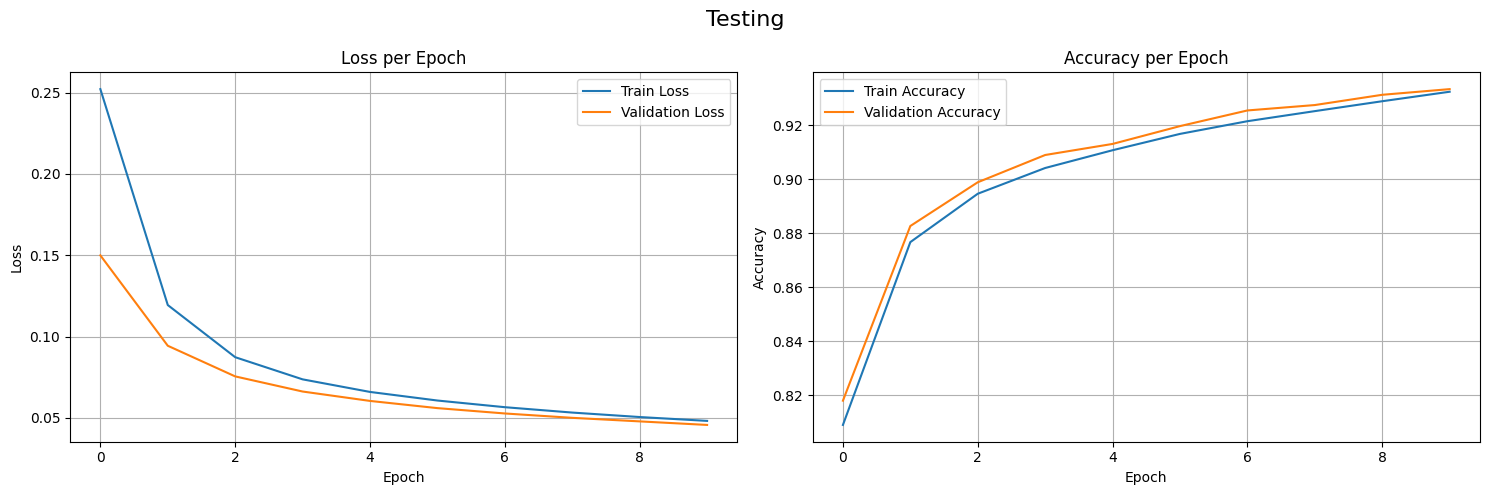

In [124]:
model.plot_training('Testing')

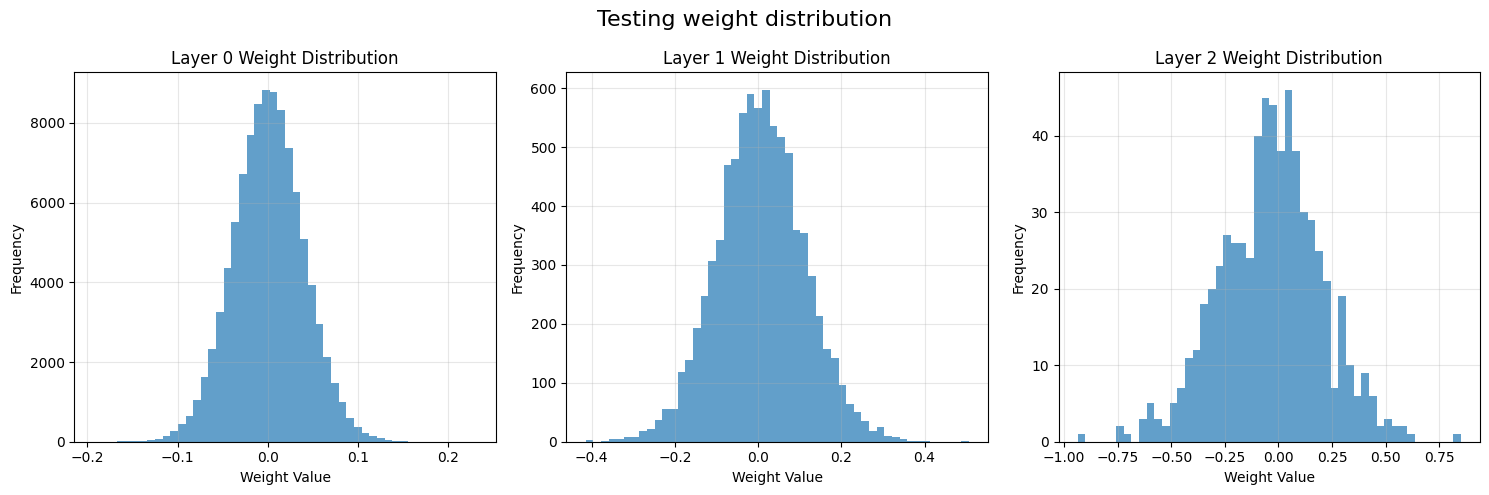

In [15]:
model.plot_weight_distribution(title='Testing weight distribution')

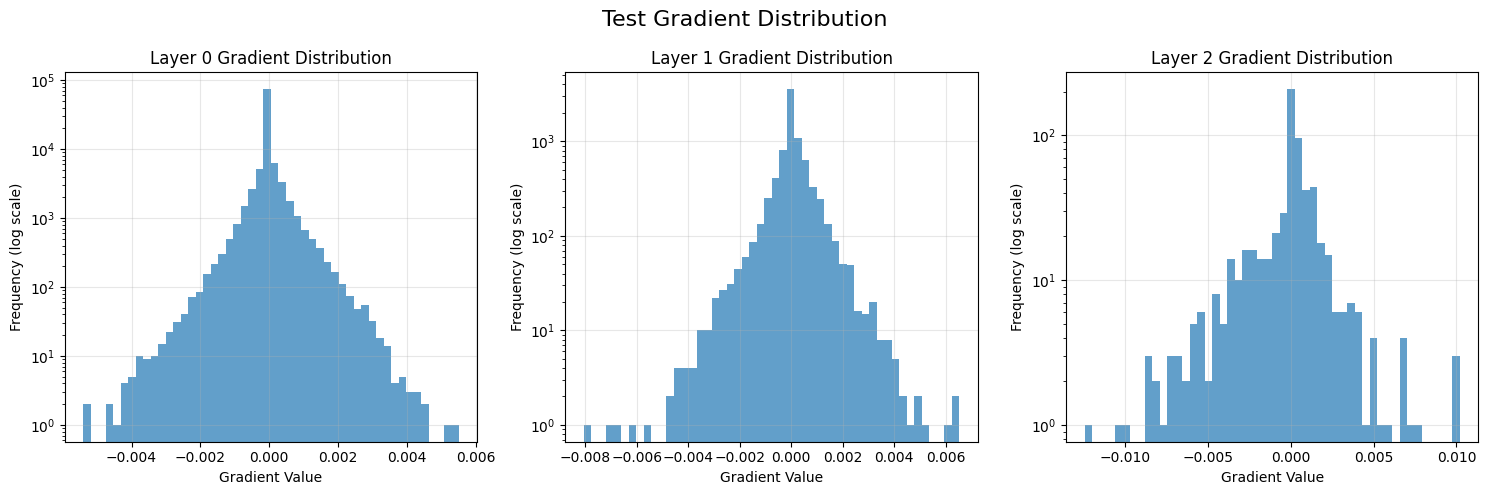

In [16]:
model.plot_gradient_distribution(title='Test Gradient Distribution')

### Example of visualizing trained model

In [17]:
model.visualize(output_dir='../ann_visualizer/output/', filename='testing')

## Analysis

### 1. Effect of depth (Number of layers) and Width (Number of neurons per layer)

#### Effect of Width (number of neurons)
- Number of hidden layers : 2
- Test 1 : 32 neurons per layer
- Test 2 : 64 neurons per layer
- Test 3 : 128 neurons per layer

##### Test 1 - 32 neurons per layer

In [18]:
model_test_1_effect_of_width = NeuralNetwork('categorical_cross_entropy')
model_test_1_effect_of_width.add_layer(DenseLayer(output_size=32, seed=40, activation=relu, init="Xavier"))
model_test_1_effect_of_width.add_layer(DenseLayer(output_size=32, seed=41, activation=relu, init="Xavier"))
model_test_1_effect_of_width.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_1_effect_of_width = model_test_1_effect_of_width.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.09s - loss: 0.5272 - accuracy: 0.9146 - val_loss: 0.2860 - val_accuracy: 0.9178
[=================================================>] 100%
Epoch 2/50 - 1.97s - loss: 0.2597 - accuracy: 0.9325 - val_loss: 0.2301 - val_accuracy: 0.9343
[=================================================>] 100%
Epoch 3/50 - 1.89s - loss: 0.2031 - accuracy: 0.9337 - val_loss: 0.2304 - val_accuracy: 0.9331
[=================================================>] 100%
Epoch 4/50 - 1.90s - loss: 0.1693 - accuracy: 0.9508 - val_loss: 0.1813 - val_accuracy: 0.9461
[=================================================>] 100%
Epoch 5/50 - 1.90s - loss: 0.1480 - accuracy: 0.9571 - val_loss: 0.1584 - val_accuracy: 0.9529
[=================================================>] 100%
Epoch 6/50 - 1.81s - loss: 0.1328 - accuracy: 0.9638 - val_loss: 0.1379 - val_accuracy: 0.9604
[=================================================>] 100%
Epoch 7/50 - 1.81s - los

In [19]:
predictions_test_1_effect_of_width = model_test_1_effect_of_width.predict(X_test)
pred_classes_test_1_effect_of_width = np.argmax(predictions_test_1_effect_of_width, axis=1)
accuracy_test_1_effect_of_width = accuracy_score(pred_classes_test_1_effect_of_width, y_test)
print("Test Accuracy:", accuracy_test_1_effect_of_width)

Test Accuracy: 0.9684


##### Test 2 - 64 neurons per layer

In [20]:
model_test_2_effect_of_width = NeuralNetwork('categorical_cross_entropy')
model_test_2_effect_of_width.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_2_effect_of_width.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_2_effect_of_width.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_2_effect_of_width = model_test_2_effect_of_width.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.21s - loss: 0.4923 - accuracy: 0.9071 - val_loss: 0.3048 - val_accuracy: 0.9080
[=================================================>] 100%
Epoch 2/50 - 2.13s - loss: 0.2294 - accuracy: 0.9411 - val_loss: 0.2025 - val_accuracy: 0.9393
[=================================================>] 100%
Epoch 3/50 - 2.19s - loss: 0.1767 - accuracy: 0.9455 - val_loss: 0.1910 - val_accuracy: 0.9435
[=================================================>] 100%
Epoch 4/50 - 2.14s - loss: 0.1455 - accuracy: 0.9590 - val_loss: 0.1558 - val_accuracy: 0.9533
[=================================================>] 100%
Epoch 5/50 - 2.23s - loss: 0.1257 - accuracy: 0.9644 - val_loss: 0.1364 - val_accuracy: 0.9597
[=================================================>] 100%
Epoch 6/50 - 2.15s - loss: 0.1105 - accuracy: 0.9700 - val_loss: 0.1178 - val_accuracy: 0.9641
[=================================================>] 100%
Epoch 7/50 - 2.18s - los

In [21]:
predictions_test_2_effect_of_width = model_test_2_effect_of_width.predict(X_test)
pred_classes_test_2_effect_of_width = np.argmax(predictions_test_2_effect_of_width, axis=1)
accuracy_test_2_effect_of_width = accuracy_score(pred_classes_test_2_effect_of_width, y_test)
print("Test Accuracy:", accuracy_test_2_effect_of_width)

Test Accuracy: 0.9764


##### Test 3 - 128 neurons per layer

In [22]:
model_test_3_effect_of_width = NeuralNetwork('categorical_cross_entropy')
model_test_3_effect_of_width.add_layer(DenseLayer(output_size=128, seed=40, activation=relu, init="Xavier"))
model_test_3_effect_of_width.add_layer(DenseLayer(output_size=128, seed=41, activation=relu, init="Xavier"))
model_test_3_effect_of_width.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_3_effect_of_width = model_test_3_effect_of_width.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 3.71s - loss: 0.4805 - accuracy: 0.9141 - val_loss: 0.2872 - val_accuracy: 0.9137
[=================================================>] 100%
Epoch 2/50 - 4.07s - loss: 0.2244 - accuracy: 0.9419 - val_loss: 0.1993 - val_accuracy: 0.9400
[=================================================>] 100%
Epoch 3/50 - 4.46s - loss: 0.1699 - accuracy: 0.9496 - val_loss: 0.1779 - val_accuracy: 0.9457
[=================================================>] 100%
Epoch 4/50 - 4.75s - loss: 0.1363 - accuracy: 0.9619 - val_loss: 0.1466 - val_accuracy: 0.9553
[=================================================>] 100%
Epoch 5/50 - 4.12s - loss: 0.1140 - accuracy: 0.9706 - val_loss: 0.1175 - val_accuracy: 0.9645
[=================================================>] 100%
Epoch 6/50 - 5.38s - loss: 0.0975 - accuracy: 0.9748 - val_loss: 0.1048 - val_accuracy: 0.9673
[=================================================>] 100%
Epoch 7/50 - 3.46s - los

In [23]:
predictions_test_3_effect_of_width = model_test_3_effect_of_width.predict(X_test)
pred_classes_test_3_effect_of_width = np.argmax(predictions_test_3_effect_of_width, axis=1)
accuracy_test_3_effect_of_width = accuracy_score(pred_classes_test_3_effect_of_width, y_test)
print("Test Accuracy:", accuracy_test_3_effect_of_width)

Test Accuracy: 0.9804


##### Effect of width - Training comparison

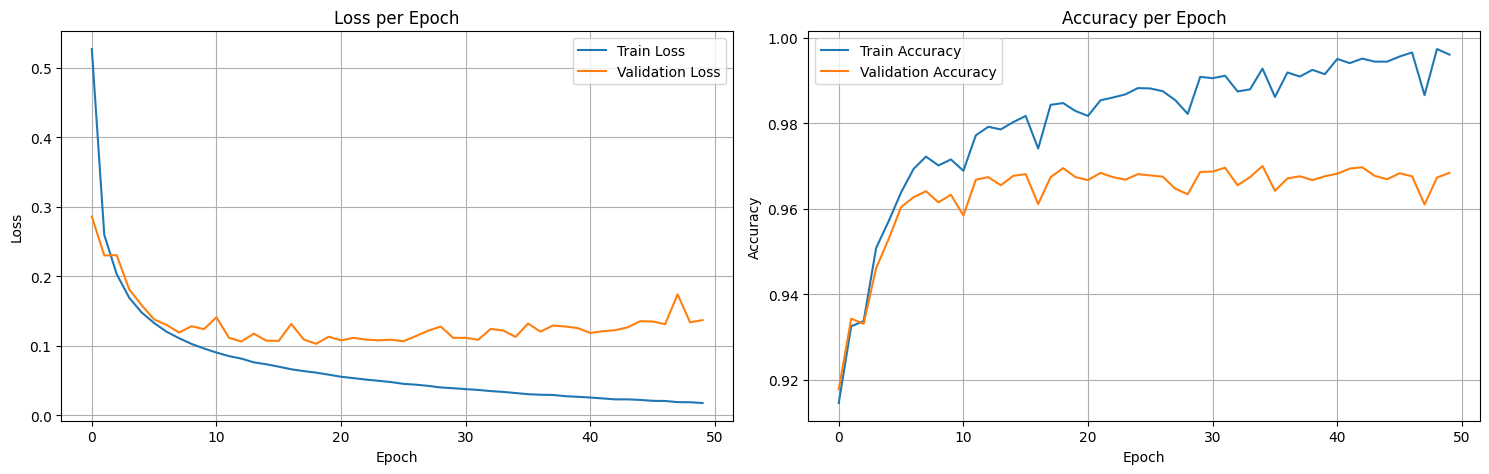

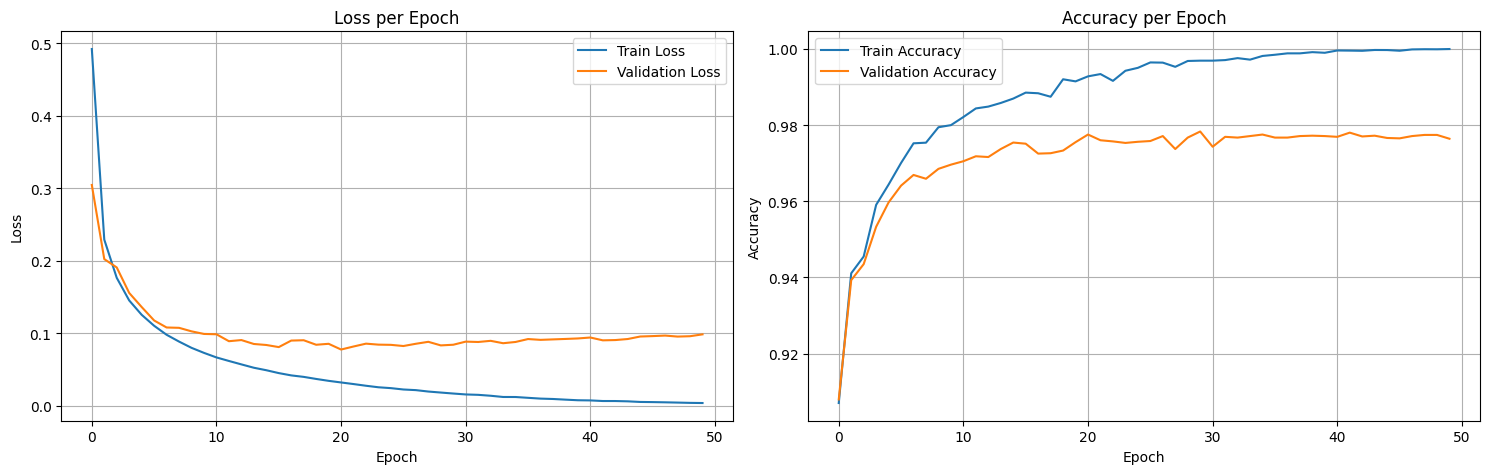

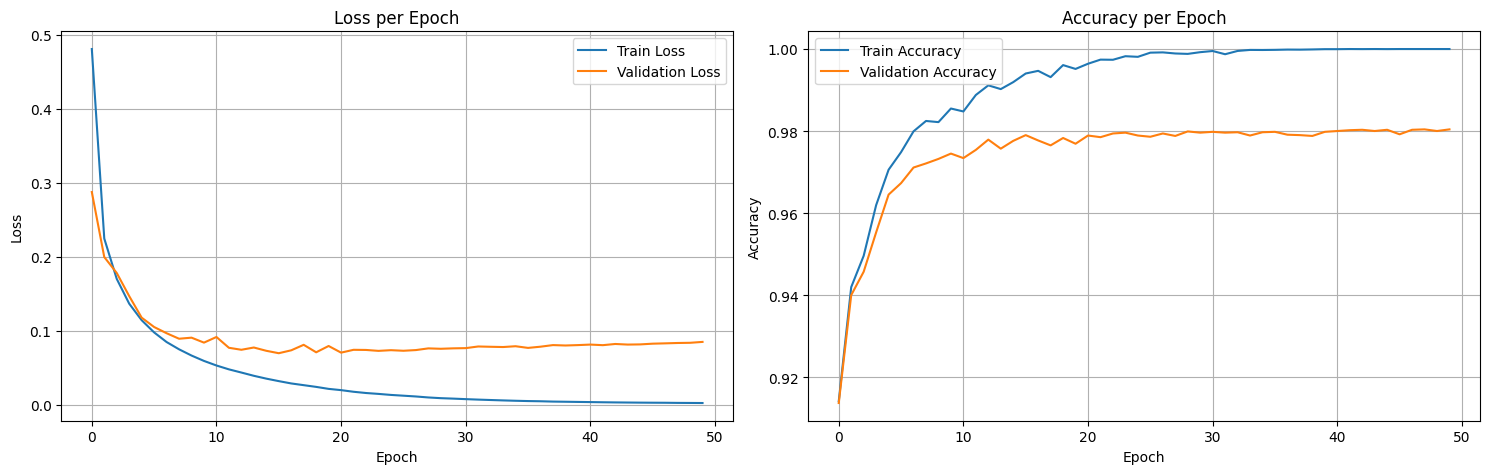

In [24]:
model_test_1_effect_of_width.plot_training()
model_test_2_effect_of_width.plot_training()
model_test_3_effect_of_width.plot_training()

##### Effect of width - Weight Distribution Comparison

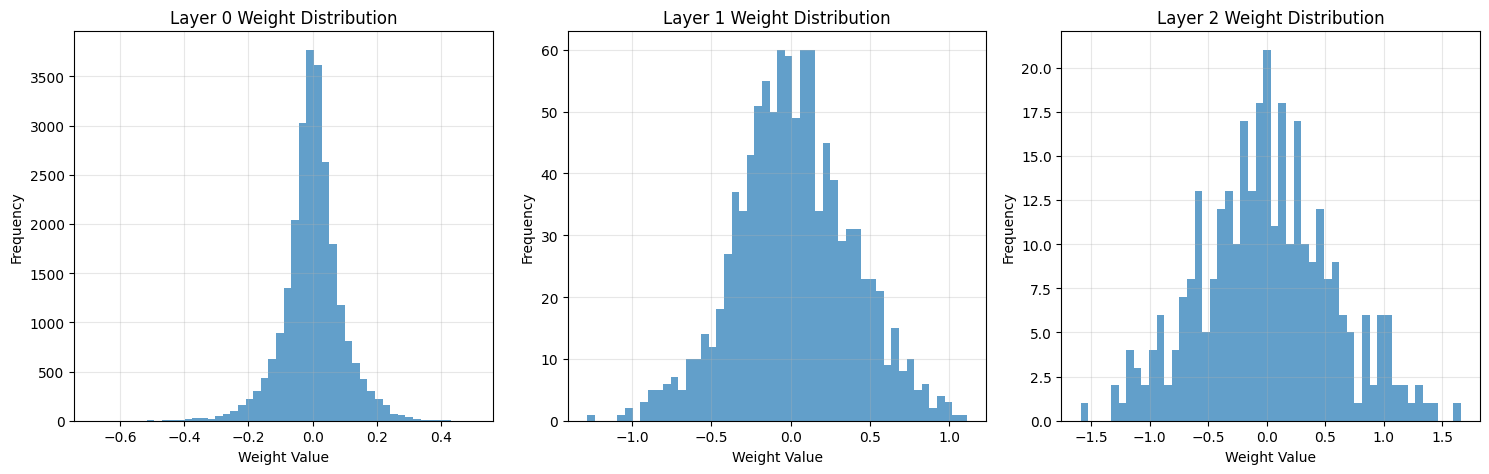

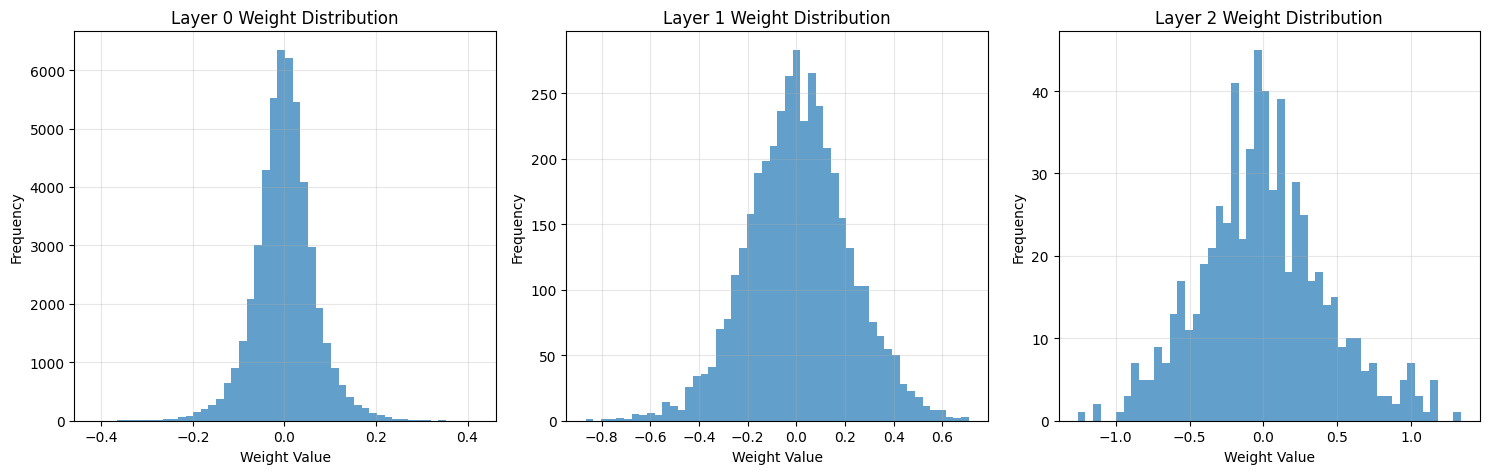

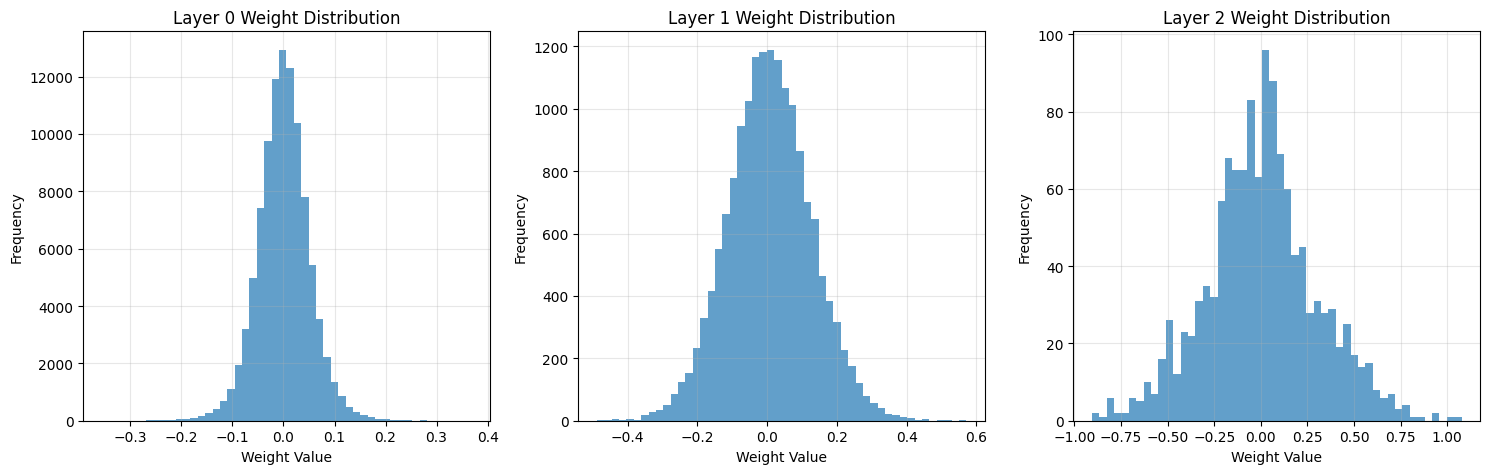

In [25]:
model_test_1_effect_of_width.plot_weight_distribution()
model_test_2_effect_of_width.plot_weight_distribution()
model_test_3_effect_of_width.plot_weight_distribution()

##### Effect of width - Gradient Distribution Comparison

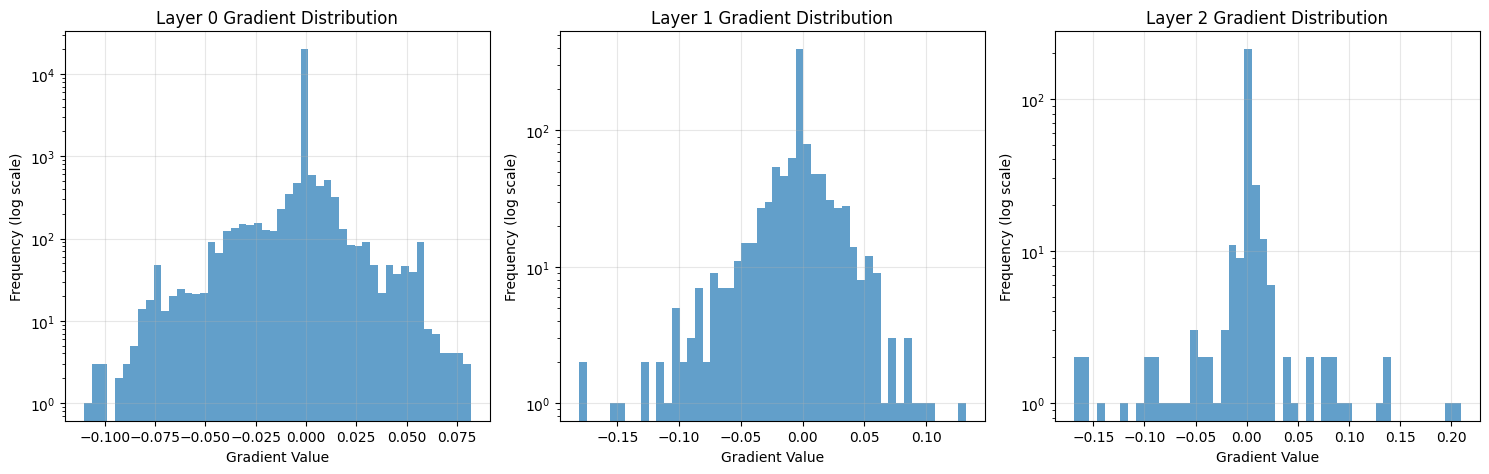

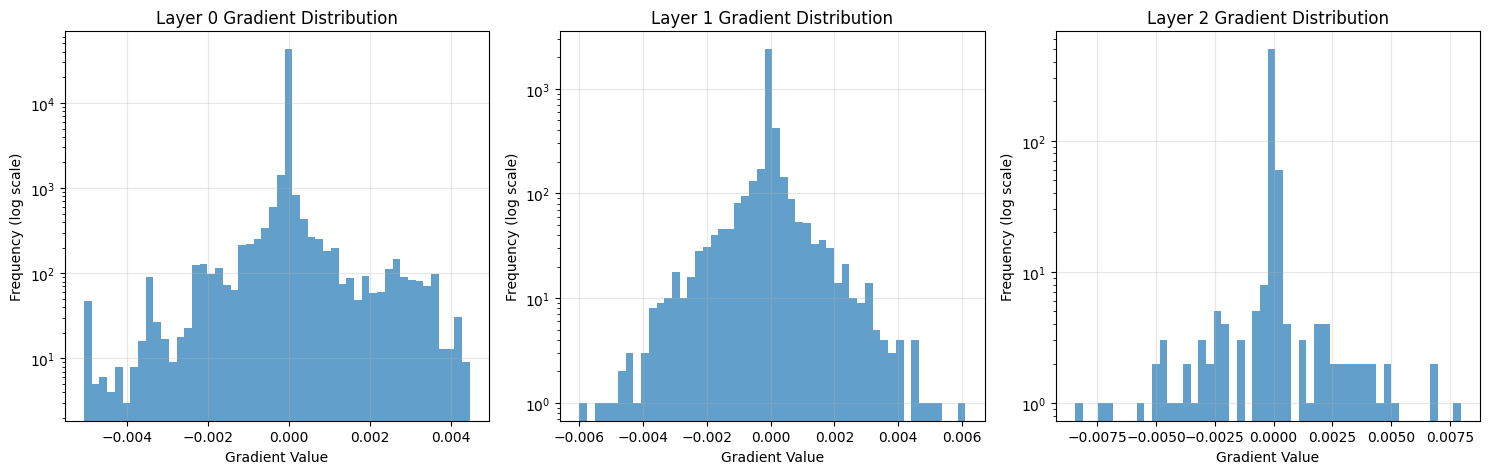

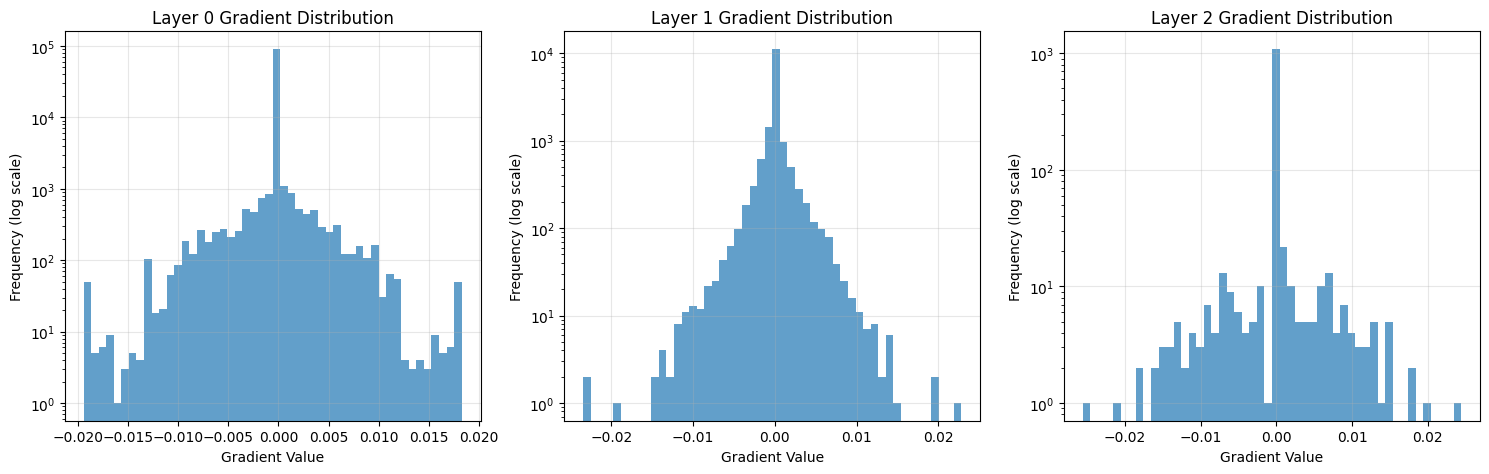

In [26]:
model_test_1_effect_of_width.plot_gradient_distribution()
model_test_2_effect_of_width.plot_gradient_distribution()
model_test_3_effect_of_width.plot_gradient_distribution()

##### Conclusion - Affect of Width (number of neurons)

Based on our experiments across models with varying widths (number of neurons per layer), wider networks demonstrated better performance, achieving higher validation accuracy and more stable learning curves. The visualizations revealed four key findings: 
1. Larger networks learn better: Networks with more neurons reached higher accuracy on both training and test datasets. They also learned faster and more smoothly.
2. Improved predictions: Networks with more neurons delivered better predictions, with the third model (the widest network) achieving the highest accuracy at 98.02%.
3. Smoother loss curves: Wider networks exhibited lower final loss values and smoother loss curves, while narrower networks showed more fluctuations.
4. Effect on weight distribution: Wider networks had weight distributions that were more centered around zero.

#### Effect of Depth (number of layers)
- Number of neurons per layer : 64
- Test 1 : 1 hidden layer
- Test 2 : 3 hidden layers
- Test 3 : 5 hidden layers

##### Test 1 - 1 hidden layer

In [27]:
model_test_1_effect_of_depth = NeuralNetwork('categorical_cross_entropy')
model_test_1_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_1_effect_of_depth.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_1_effect_of_depth = model_test_1_effect_of_depth.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.10s - loss: 0.5140 - accuracy: 0.9091 - val_loss: 0.3100 - val_accuracy: 0.9112
[=================================================>] 100%
Epoch 2/50 - 2.07s - loss: 0.2844 - accuracy: 0.9260 - val_loss: 0.2507 - val_accuracy: 0.9288
[=================================================>] 100%
Epoch 3/50 - 2.08s - loss: 0.2344 - accuracy: 0.9388 - val_loss: 0.2178 - val_accuracy: 0.9365
[=================================================>] 100%
Epoch 4/50 - 2.08s - loss: 0.1992 - accuracy: 0.9478 - val_loss: 0.1890 - val_accuracy: 0.9444
[=================================================>] 100%
Epoch 5/50 - 2.11s - loss: 0.1747 - accuracy: 0.9551 - val_loss: 0.1632 - val_accuracy: 0.9520
[=================================================>] 100%
Epoch 6/50 - 2.10s - loss: 0.1557 - accuracy: 0.9585 - val_loss: 0.1503 - val_accuracy: 0.9553
[=================================================>] 100%
Epoch 7/50 - 2.27s - los

In [28]:
predictions_test_1_effect_of_depth = model_test_1_effect_of_depth.predict(X_test)
pred_classes_test_1_effect_of_depth = np.argmax(predictions_test_1_effect_of_depth, axis=1)
accuracy_test_1_effect_of_depth = accuracy_score(pred_classes_test_1_effect_of_depth, y_test)
print("Test Accuracy:", accuracy_test_1_effect_of_depth)

Test Accuracy: 0.9766


##### Test 2 - 3 hidden layer

In [29]:
model_test_2_effect_of_depth = NeuralNetwork('categorical_cross_entropy')
model_test_2_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_2_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_2_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=42, activation=relu, init="Xavier"))
model_test_2_effect_of_depth.add_layer(DenseLayer(output_size=10, seed=43, activation=softmax, init="Xavier"))

history_test_2_effect_of_depth = model_test_2_effect_of_depth.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.50s - loss: 0.5105 - accuracy: 0.9069 - val_loss: 0.3066 - val_accuracy: 0.9058
[=================================================>] 100%
Epoch 2/50 - 2.44s - loss: 0.2108 - accuracy: 0.9511 - val_loss: 0.1694 - val_accuracy: 0.9512
[=================================================>] 100%
Epoch 3/50 - 2.55s - loss: 0.1531 - accuracy: 0.9369 - val_loss: 0.2207 - val_accuracy: 0.9330
[=================================================>] 100%
Epoch 4/50 - 2.58s - loss: 0.1229 - accuracy: 0.9691 - val_loss: 0.1262 - val_accuracy: 0.9599
[=================================================>] 100%
Epoch 5/50 - 3.46s - loss: 0.1020 - accuracy: 0.9702 - val_loss: 0.1213 - val_accuracy: 0.9626
[=================================================>] 100%
Epoch 6/50 - 3.20s - loss: 0.0890 - accuracy: 0.9763 - val_loss: 0.1029 - val_accuracy: 0.9684
[=================================================>] 100%
Epoch 7/50 - 3.11s - los

In [30]:
predictions_test_2_effect_of_depth = model_test_2_effect_of_depth.predict(X_test)
pred_classes_test_2_effect_of_depth = np.argmax(predictions_test_2_effect_of_depth, axis=1)
accuracy_test_2_effect_of_depth = accuracy_score(pred_classes_test_2_effect_of_depth, y_test)
print("Test Accuracy:", accuracy_test_2_effect_of_depth)

Test Accuracy: 0.9749


##### Test 3 - 5 hidden layer

In [31]:
model_test_3_effect_of_depth = NeuralNetwork('categorical_cross_entropy')
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=42, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=43, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=44, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=10, seed=45, activation=softmax, init="Xavier"))

history_test_3_effect_of_depth = model_test_3_effect_of_depth.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 3.23s - loss: 0.5902 - accuracy: 0.8921 - val_loss: 0.3498 - val_accuracy: 0.8876
[=================================================>] 100%
Epoch 2/50 - 3.41s - loss: 0.1820 - accuracy: 0.9296 - val_loss: 0.2352 - val_accuracy: 0.9238
[=================================================>] 100%
Epoch 3/50 - 3.81s - loss: 0.1293 - accuracy: 0.9710 - val_loss: 0.1230 - val_accuracy: 0.9613
[=================================================>] 100%
Epoch 4/50 - 2.76s - loss: 0.1026 - accuracy: 0.9715 - val_loss: 0.1247 - val_accuracy: 0.9633
[=================================================>] 100%
Epoch 5/50 - 2.80s - loss: 0.0864 - accuracy: 0.9789 - val_loss: 0.1030 - val_accuracy: 0.9672
[=================================================>] 100%
Epoch 6/50 - 2.86s - loss: 0.0748 - accuracy: 0.9824 - val_loss: 0.1050 - val_accuracy: 0.9672
[=================================================>] 100%
Epoch 7/50 - 2.94s - los

In [32]:
predictions_test_3_effect_of_depth = model_test_3_effect_of_depth.predict(X_test)
pred_classes_test_3_effect_of_depth = np.argmax(predictions_test_3_effect_of_depth, axis=1)
accuracy_test_3_effect_of_depth = accuracy_score(pred_classes_test_3_effect_of_depth, y_test)
print("Test Accuracy:", accuracy_test_3_effect_of_depth)

Test Accuracy: 0.9776


##### Effect of depth - Training Comparison

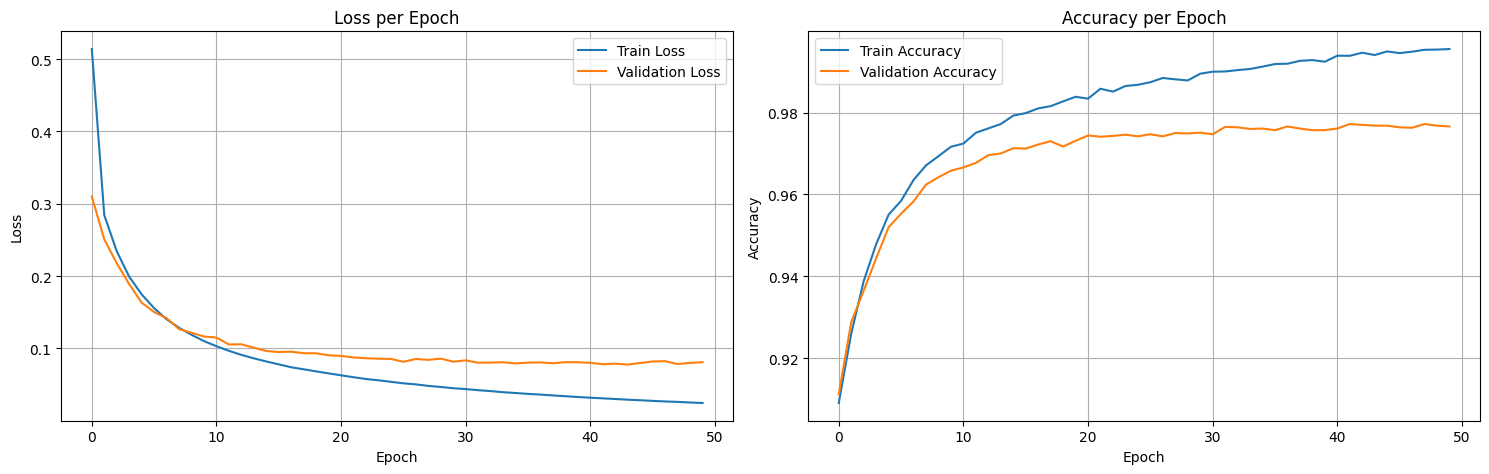

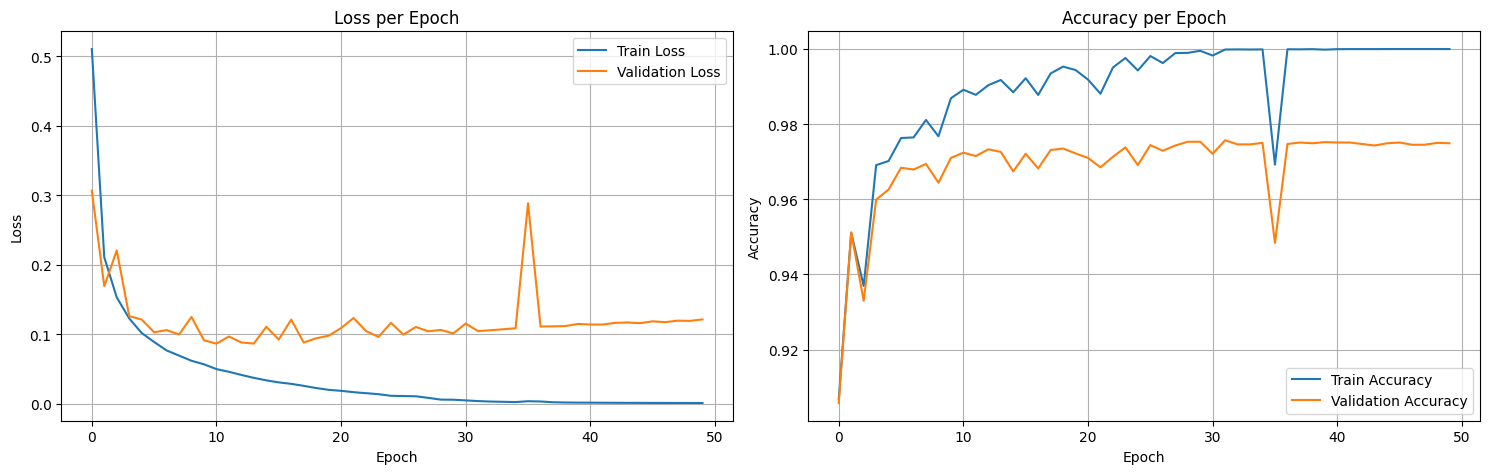

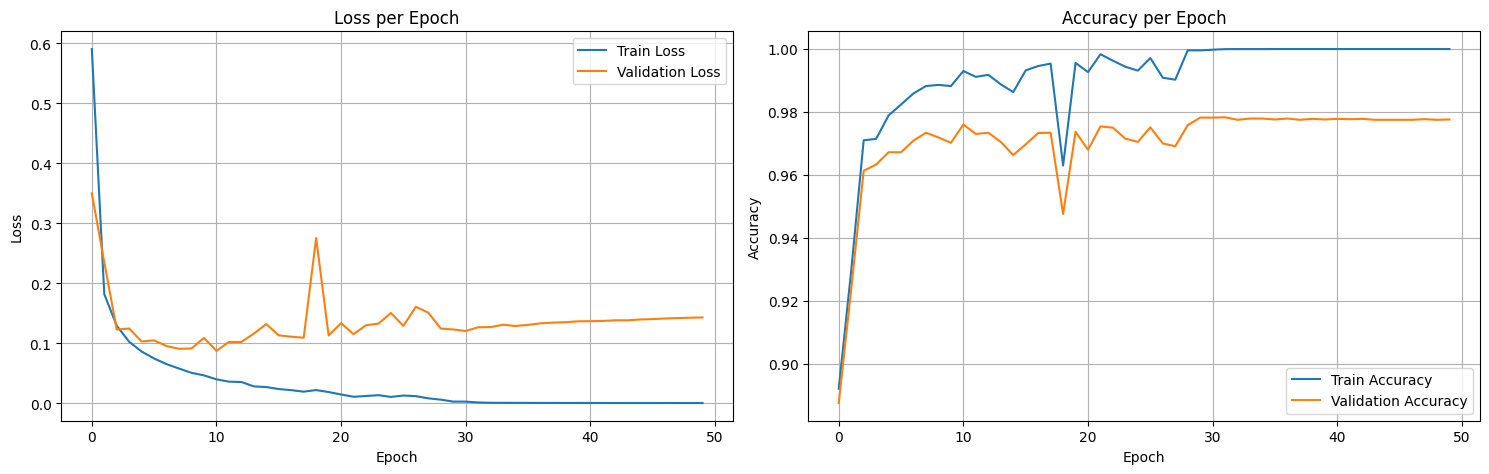

In [33]:
model_test_1_effect_of_depth.plot_training()
model_test_2_effect_of_depth.plot_training()
model_test_3_effect_of_depth.plot_training()

##### Effect of depth - Weight Distribution Comparison

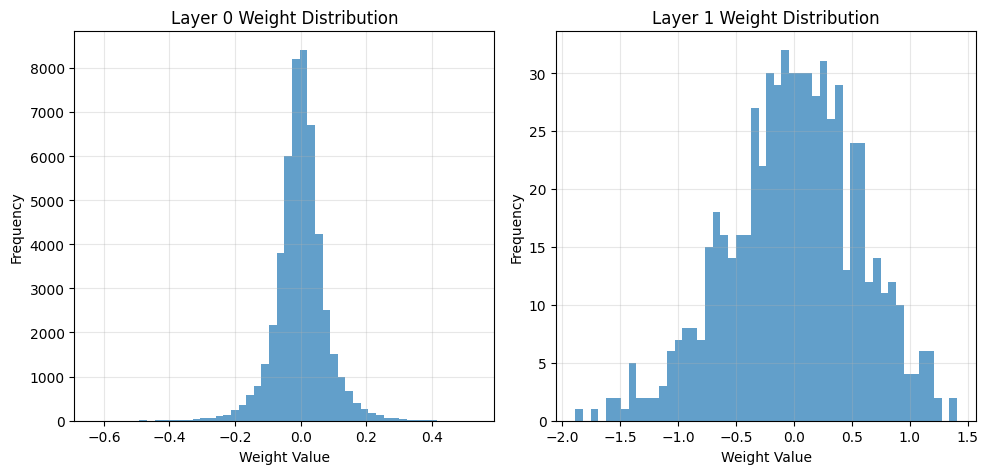

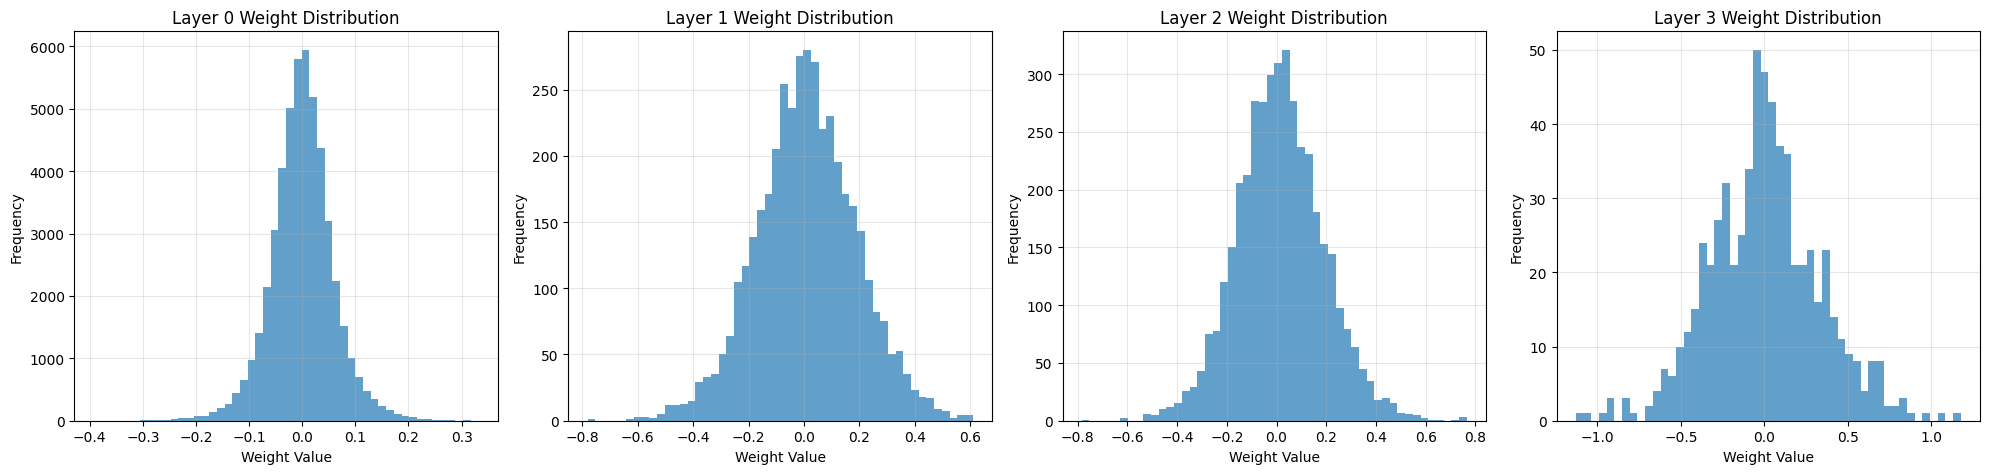

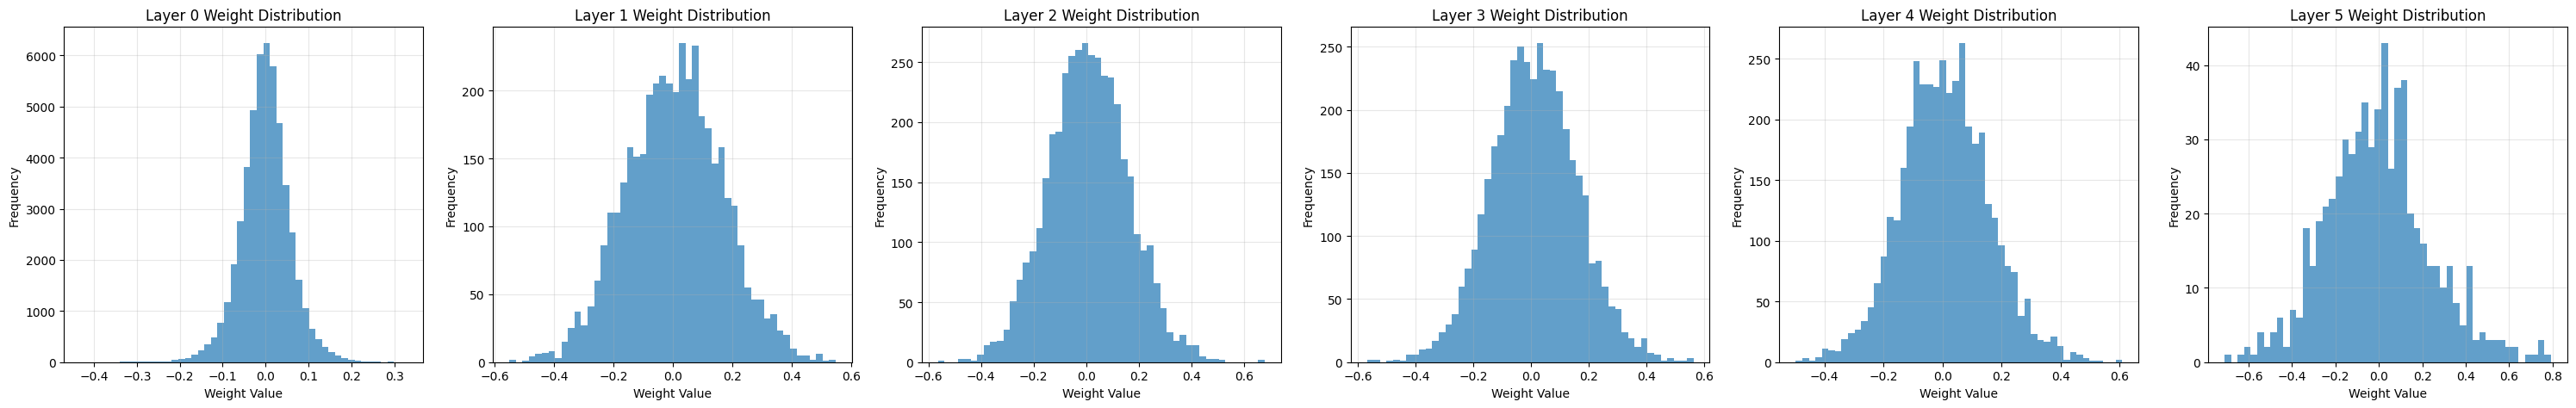

In [34]:
model_test_1_effect_of_depth.plot_weight_distribution()
model_test_2_effect_of_depth.plot_weight_distribution()
model_test_3_effect_of_depth.plot_weight_distribution()

##### Effect of depth - Gradient Distribution Comparison

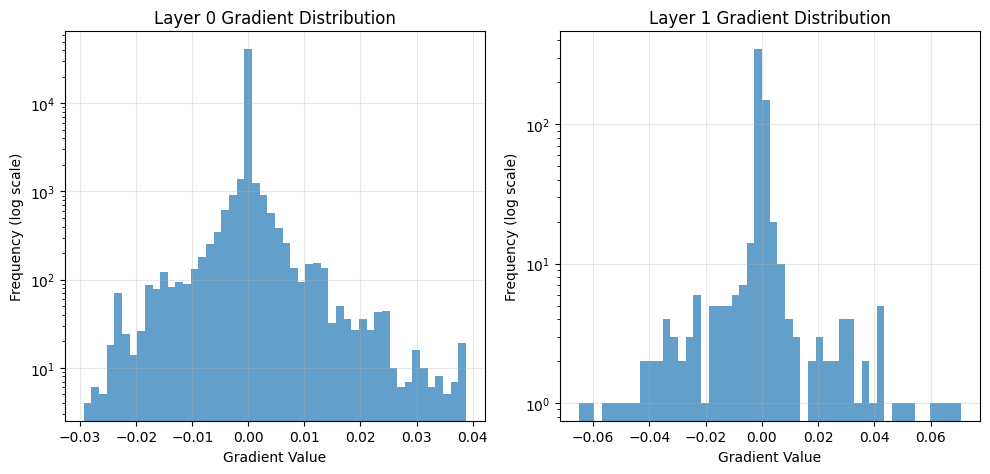

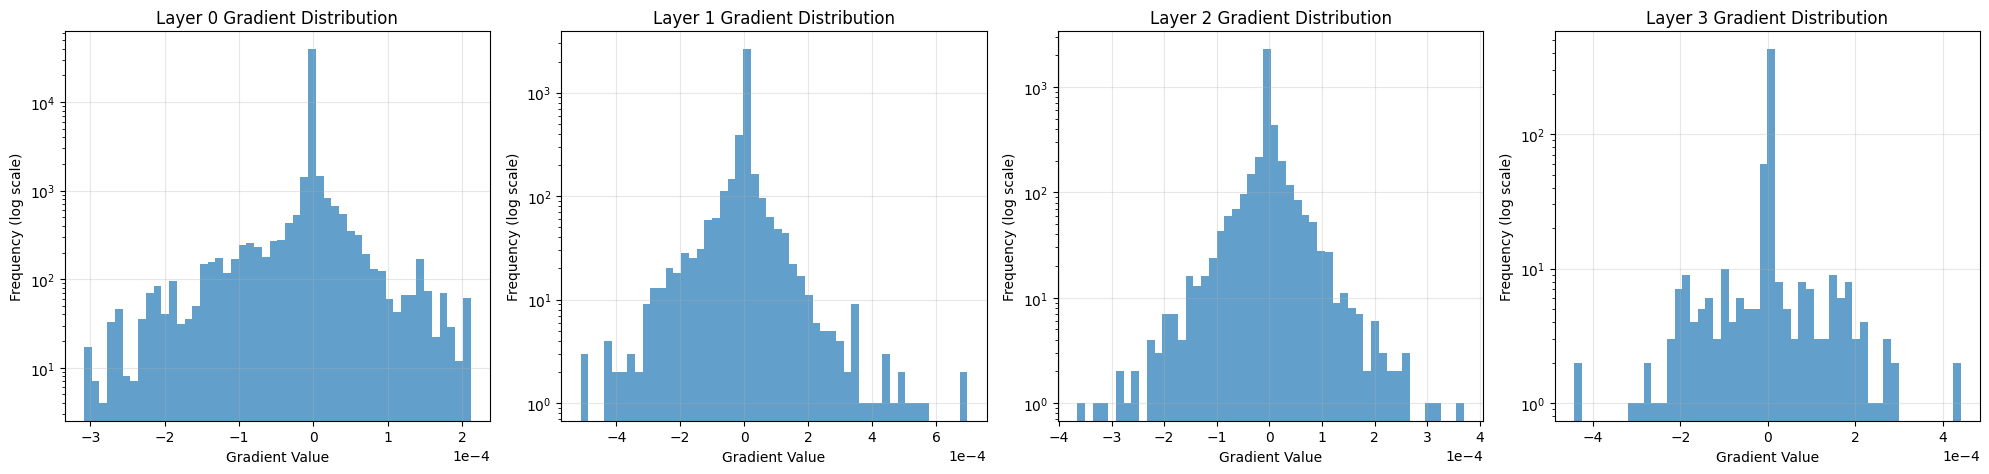

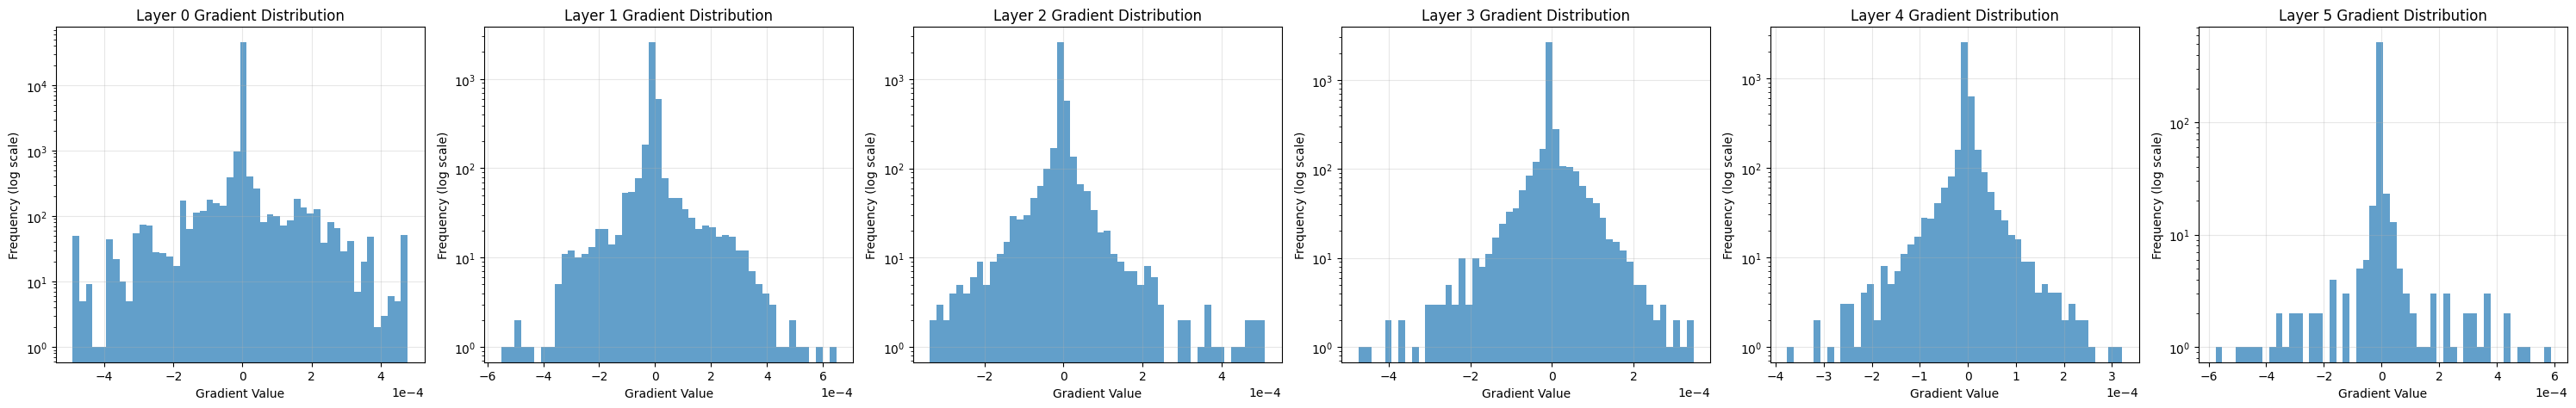

In [35]:
model_test_1_effect_of_depth.plot_gradient_distribution()
model_test_2_effect_of_depth.plot_gradient_distribution()
model_test_3_effect_of_depth.plot_gradient_distribution()

##### Conclusion - Affect of Depth (number of layers)

Based on our experiments across models with varying depths (number of layers), deeper networks do not always lead to better performance. In fact, deeper networks exhibited more instability in their loss curves, indicating less stable training behavior. The visualizations revealed two key findings:
1. Non-linear performance gains : Adding more layes doesn't necessary mean that models will perform better. The first model, with only one hidden layer, achieved higher accuracy than the second model, which had three hidden layers.
2. Unstable training : Increasing the number of layers tend to led to more dramatic fluctuations in the loss graph. This suggests that deeper networks experienced more unstable training patterns.

### 2. Effect of activation function

#### Effects of activation functions in hidden layer - Test and parameters :
- 2 hidden layers
- 64 neurons per layer
- Test 1 : Linear
- Test 2 : ReLu
- Test 3 : Sigmoid
- Test 4 : Tanh

##### Test 1 - Linear

In [36]:
model_test_1_effect_of_activation_function = NeuralNetwork('categorical_cross_entropy')
model_test_1_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=40, activation=linear, init="Xavier"))
model_test_1_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=41, activation=linear, init="Xavier"))
model_test_1_effect_of_activation_function.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_1_effect_of_activation_function = model_test_1_effect_of_activation_function.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.14s - loss: 0.4380 - accuracy: 0.9069 - val_loss: 0.3180 - val_accuracy: 0.9106
[=================================================>] 100%
Epoch 2/50 - 2.07s - loss: 0.3098 - accuracy: 0.9131 - val_loss: 0.2970 - val_accuracy: 0.9177
[=================================================>] 100%
Epoch 3/50 - 2.08s - loss: 0.2956 - accuracy: 0.9105 - val_loss: 0.3049 - val_accuracy: 0.9131
[=================================================>] 100%
Epoch 4/50 - 2.08s - loss: 0.2860 - accuracy: 0.9196 - val_loss: 0.2951 - val_accuracy: 0.9144
[=================================================>] 100%
Epoch 5/50 - 2.10s - loss: 0.2818 - accuracy: 0.9230 - val_loss: 0.2857 - val_accuracy: 0.9179
[=================================================>] 100%
Epoch 6/50 - 2.05s - loss: 0.2784 - accuracy: 0.9227 - val_loss: 0.2900 - val_accuracy: 0.9214
[=================================================>] 100%
Epoch 7/50 - 2.04s - los

In [37]:
predictions_test_1_effect_of_activation_function = model_test_1_effect_of_activation_function.predict(X_test)
pred_classes_test_1_effect_of_activation_function = np.argmax(predictions_test_1_effect_of_activation_function, axis=1)
accuracy_test_1_effect_of_activation_function = accuracy_score(pred_classes_test_1_effect_of_activation_function, y_test)
print("Test Accuracy:", accuracy_test_1_effect_of_activation_function)

Test Accuracy: 0.9228


##### Test 2 - ReLu

In [38]:
model_test_2_effect_of_activation_function = NeuralNetwork('categorical_cross_entropy')
model_test_2_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_2_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_2_effect_of_activation_function.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_2_effect_of_activation_function = model_test_2_effect_of_activation_function.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.46s - loss: 0.4923 - accuracy: 0.9071 - val_loss: 0.3048 - val_accuracy: 0.9080
[=================================================>] 100%
Epoch 2/50 - 2.53s - loss: 0.2294 - accuracy: 0.9411 - val_loss: 0.2025 - val_accuracy: 0.9393
[=================================================>] 100%
Epoch 3/50 - 2.56s - loss: 0.1767 - accuracy: 0.9455 - val_loss: 0.1910 - val_accuracy: 0.9435
[=================================================>] 100%
Epoch 4/50 - 2.69s - loss: 0.1455 - accuracy: 0.9590 - val_loss: 0.1558 - val_accuracy: 0.9533
[=================================================>] 100%
Epoch 5/50 - 2.77s - loss: 0.1257 - accuracy: 0.9644 - val_loss: 0.1364 - val_accuracy: 0.9597
[=================================================>] 100%
Epoch 6/50 - 3.76s - loss: 0.1105 - accuracy: 0.9700 - val_loss: 0.1178 - val_accuracy: 0.9641
[=================================================>] 100%
Epoch 7/50 - 4.54s - los

In [39]:
predictions_test_2_effect_of_activation_function = model_test_2_effect_of_activation_function.predict(X_test)
pred_classes_test_2_effect_of_activation_function = np.argmax(predictions_test_2_effect_of_activation_function, axis=1)
accuracy_test_2_effect_of_activation_function = accuracy_score(pred_classes_test_2_effect_of_activation_function, y_test)
print("Test Accuracy:", accuracy_test_2_effect_of_activation_function)

Test Accuracy: 0.9764


##### Test 3 - Sigmoid

In [40]:
model_test_3_effect_of_activation_function = NeuralNetwork('categorical_cross_entropy')
model_test_3_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=40, activation=sigmoid, init="Xavier"))
model_test_3_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=41, activation=sigmoid, init="Xavier"))
model_test_3_effect_of_activation_function.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_3_effect_of_activation_function = model_test_3_effect_of_activation_function.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.29s - loss: 2.0061 - accuracy: 0.6178 - val_loss: 1.4100 - val_accuracy: 0.6247
[=================================================>] 100%
Epoch 2/50 - 2.27s - loss: 1.0047 - accuracy: 0.8165 - val_loss: 0.7132 - val_accuracy: 0.8224
[=================================================>] 100%
Epoch 3/50 - 2.28s - loss: 0.5959 - accuracy: 0.8679 - val_loss: 0.4874 - val_accuracy: 0.8721
[=================================================>] 100%
Epoch 4/50 - 2.28s - loss: 0.4501 - accuracy: 0.8891 - val_loss: 0.3991 - val_accuracy: 0.8900
[=================================================>] 100%
Epoch 5/50 - 2.31s - loss: 0.3847 - accuracy: 0.9001 - val_loss: 0.3516 - val_accuracy: 0.9031
[=================================================>] 100%
Epoch 6/50 - 2.41s - loss: 0.3478 - accuracy: 0.9042 - val_loss: 0.3270 - val_accuracy: 0.9081
[=================================================>] 100%
Epoch 7/50 - 2.28s - los

In [41]:
predictions_test_3_effect_of_activation_function = model_test_3_effect_of_activation_function.predict(X_test)
pred_classes_test_3_effect_of_activation_function = np.argmax(predictions_test_3_effect_of_activation_function, axis=1)
accuracy_test_3_effect_of_activation_function = accuracy_score(pred_classes_test_3_effect_of_activation_function, y_test)
print("Test Accuracy:", accuracy_test_3_effect_of_activation_function)

Test Accuracy: 0.968


##### Test 4 - Tanh

In [42]:
model_test_4_effect_of_activation_function = NeuralNetwork('categorical_cross_entropy')
model_test_4_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=40, activation=tanh, init="Xavier"))
model_test_4_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=41, activation=tanh, init="Xavier"))
model_test_4_effect_of_activation_function.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_4_effect_of_activation_function = model_test_4_effect_of_activation_function.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.52s - loss: 0.4779 - accuracy: 0.9165 - val_loss: 0.2850 - val_accuracy: 0.9178
[=================================================>] 100%
Epoch 2/50 - 3.51s - loss: 0.2560 - accuracy: 0.9346 - val_loss: 0.2211 - val_accuracy: 0.9354
[=================================================>] 100%
Epoch 3/50 - 2.21s - loss: 0.2049 - accuracy: 0.9440 - val_loss: 0.1931 - val_accuracy: 0.9428
[=================================================>] 100%
Epoch 4/50 - 2.16s - loss: 0.1702 - accuracy: 0.9539 - val_loss: 0.1676 - val_accuracy: 0.9484
[=================================================>] 100%
Epoch 5/50 - 2.14s - loss: 0.1461 - accuracy: 0.9611 - val_loss: 0.1462 - val_accuracy: 0.9559
[=================================================>] 100%
Epoch 6/50 - 2.19s - loss: 0.1283 - accuracy: 0.9664 - val_loss: 0.1282 - val_accuracy: 0.9607
[=================================================>] 100%
Epoch 7/50 - 2.17s - los

In [43]:
predictions_test_4_effect_of_activation_function = model_test_4_effect_of_activation_function.predict(X_test)
pred_classes_test_4_effect_of_activation_function = np.argmax(predictions_test_4_effect_of_activation_function, axis=1)
accuracy_test_4_effect_of_activation_function = accuracy_score(pred_classes_test_4_effect_of_activation_function, y_test)
print("Test Accuracy:", accuracy_test_4_effect_of_activation_function)

Test Accuracy: 0.9758


##### Effect of activation function - Training Comparison

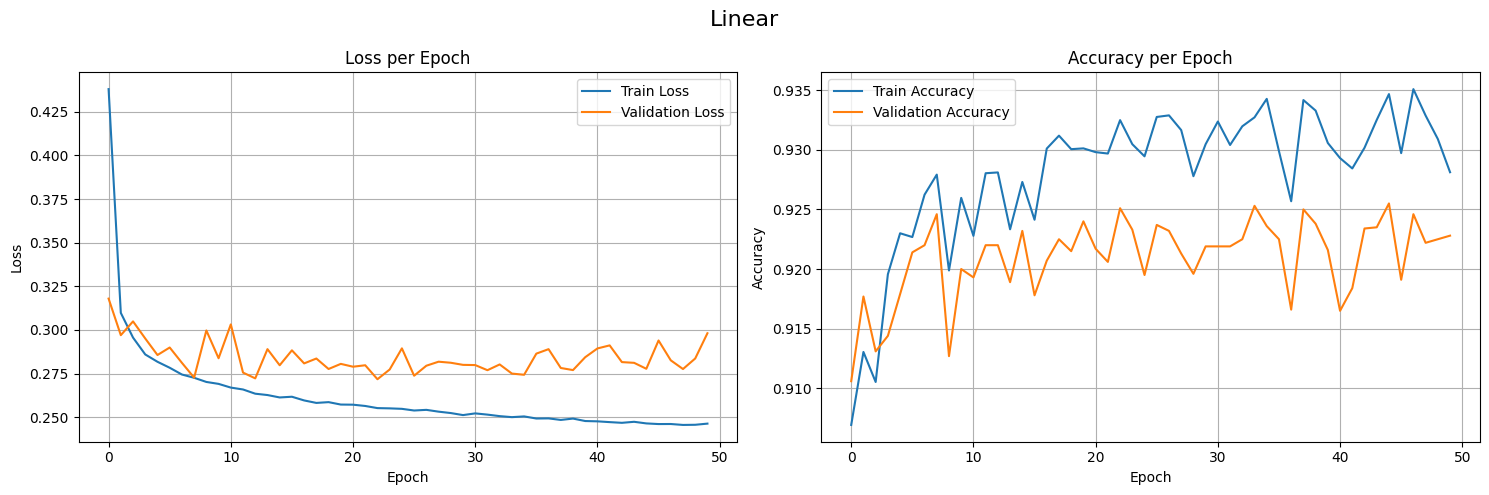

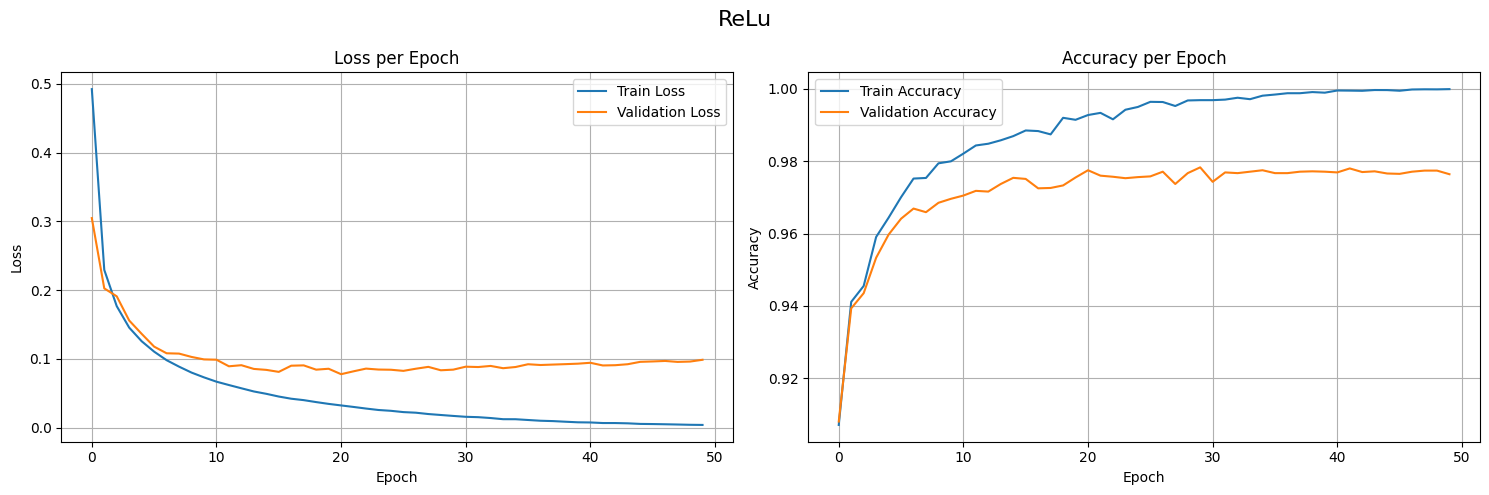

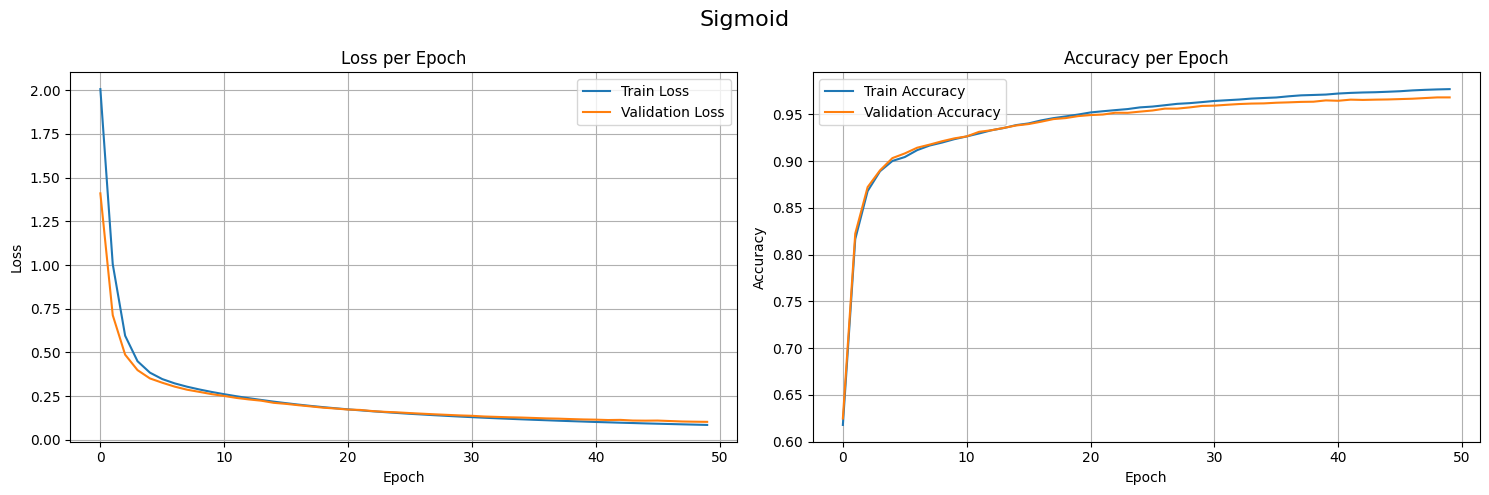

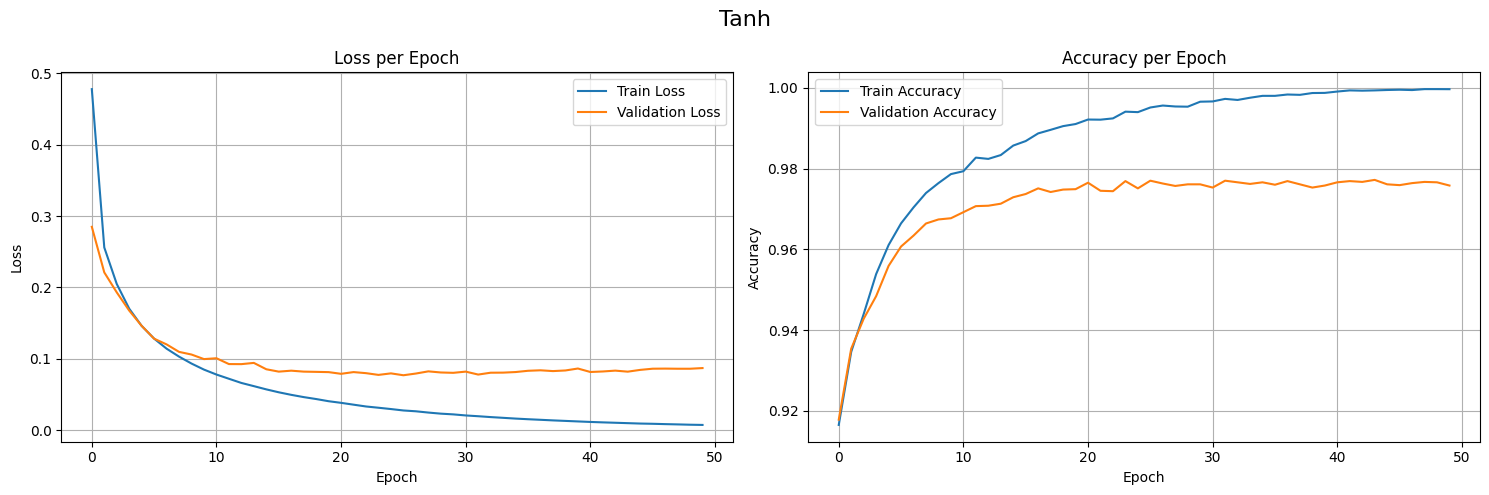

In [44]:
model_test_1_effect_of_activation_function.plot_training(title='Linear')
model_test_2_effect_of_activation_function.plot_training(title='ReLu')
model_test_3_effect_of_activation_function.plot_training(title='Sigmoid')
model_test_4_effect_of_activation_function.plot_training(title='Tanh')

##### Effect of activation function - Weight Distribution Comparison

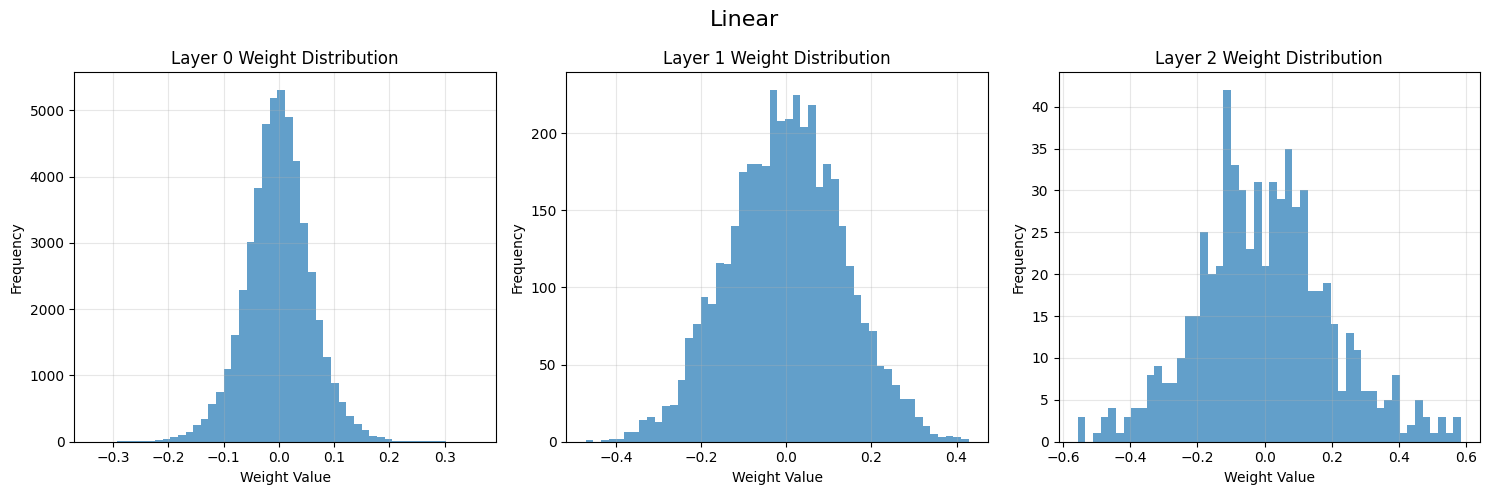

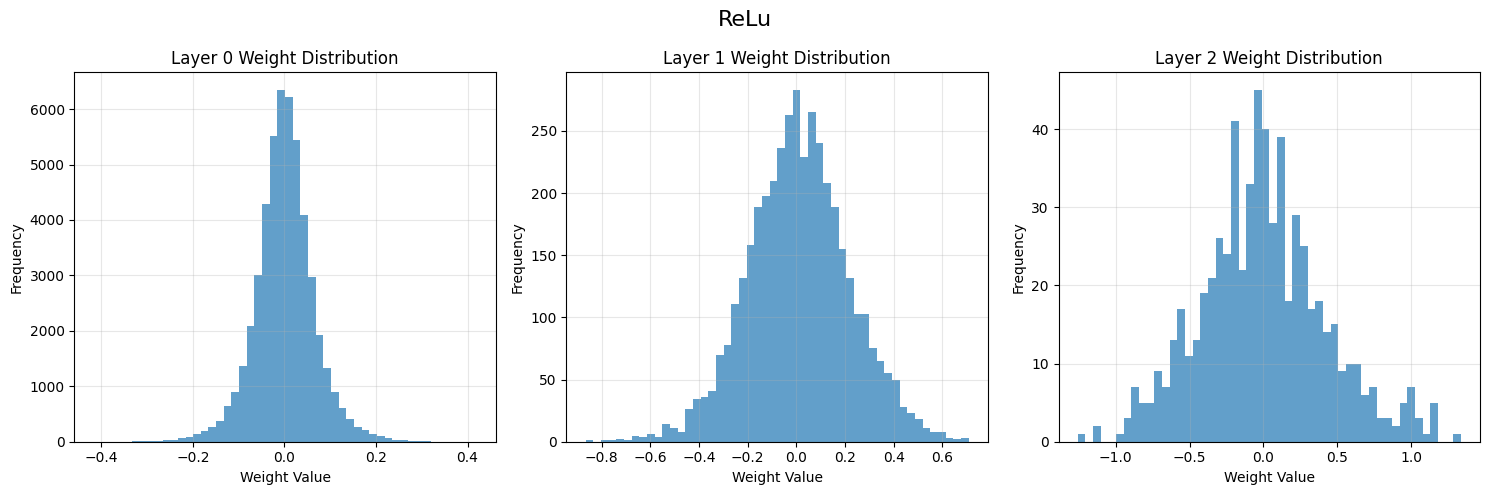

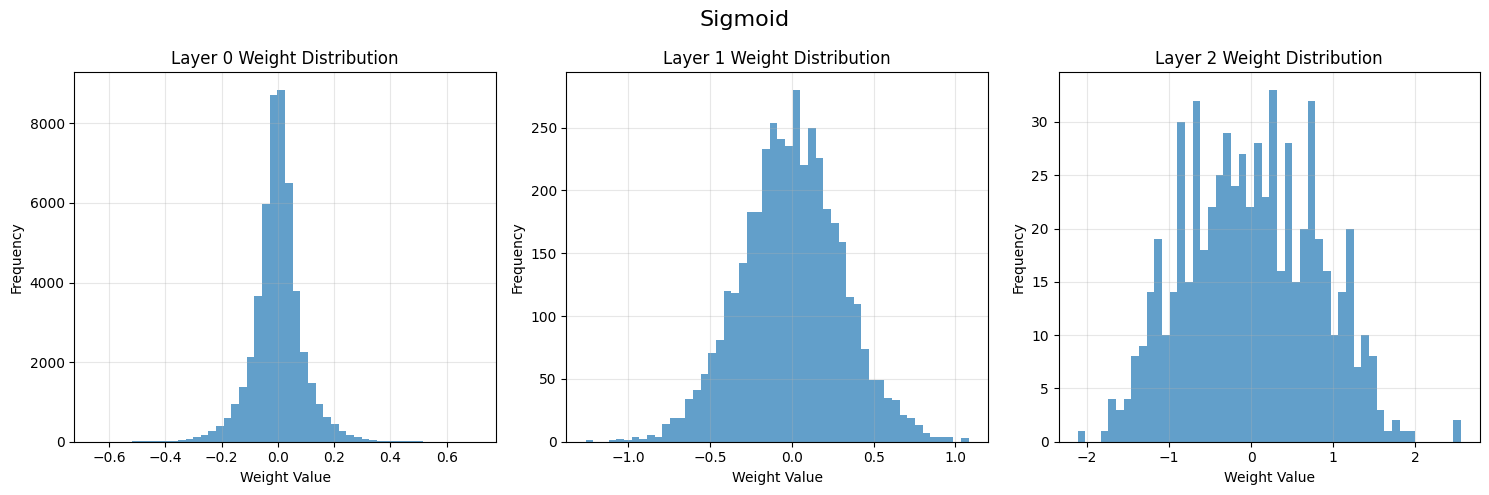

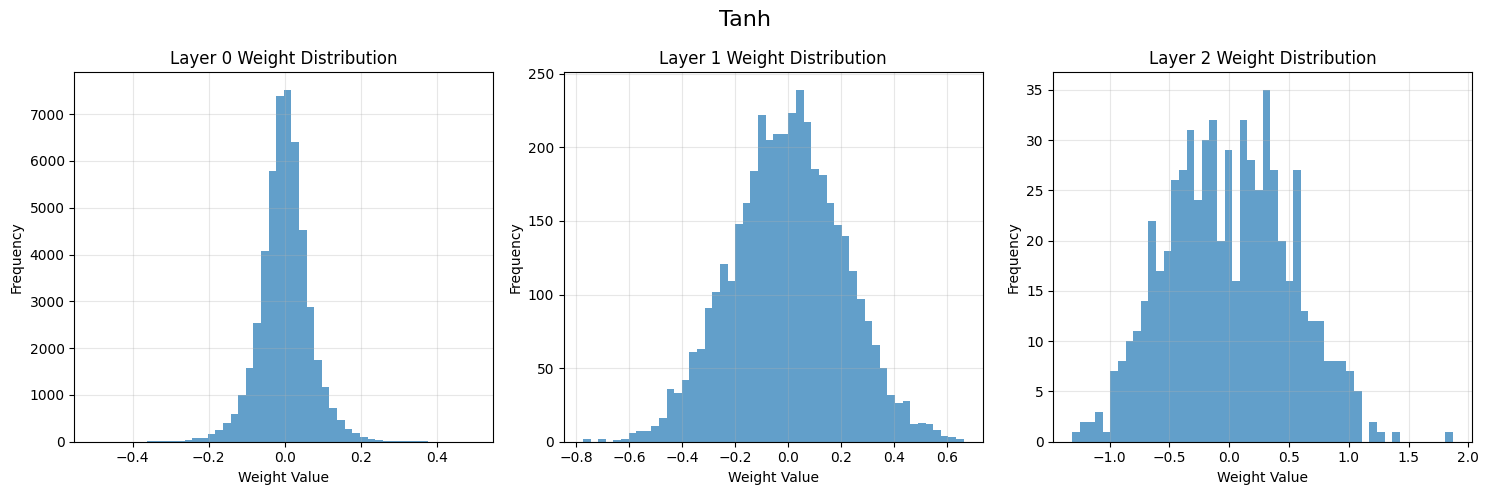

In [45]:
model_test_1_effect_of_activation_function.plot_weight_distribution(title='Linear')
model_test_2_effect_of_activation_function.plot_weight_distribution(title='ReLu')
model_test_3_effect_of_activation_function.plot_weight_distribution(title='Sigmoid')
model_test_4_effect_of_activation_function.plot_weight_distribution(title='Tanh')

##### Effect of activation function - Gradient Distribution Comparison

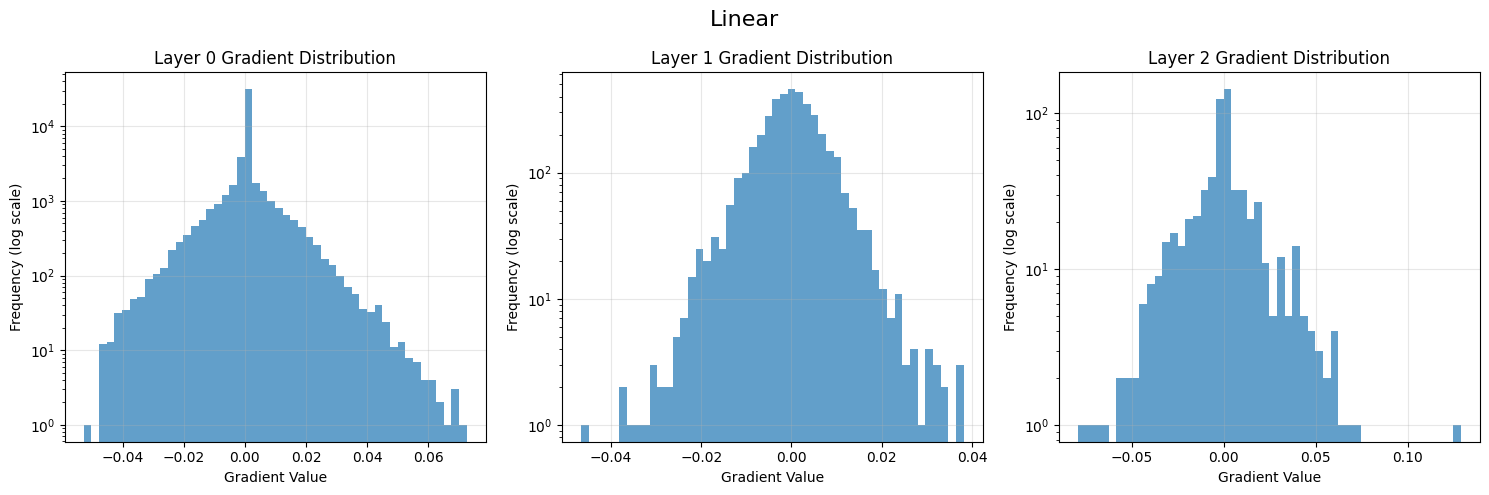

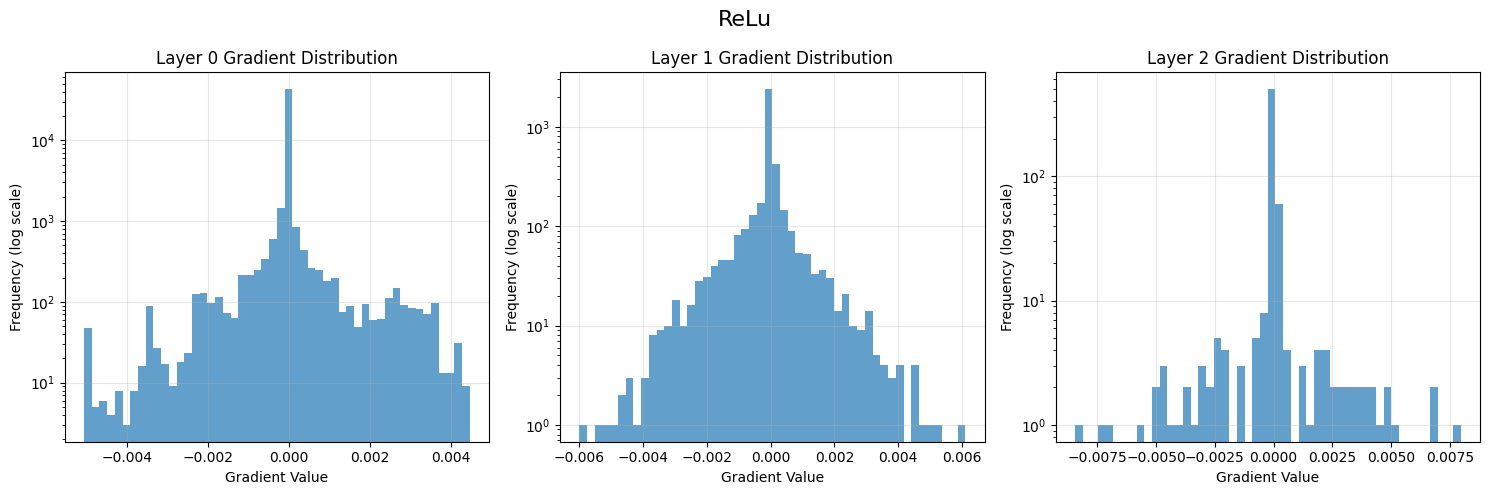

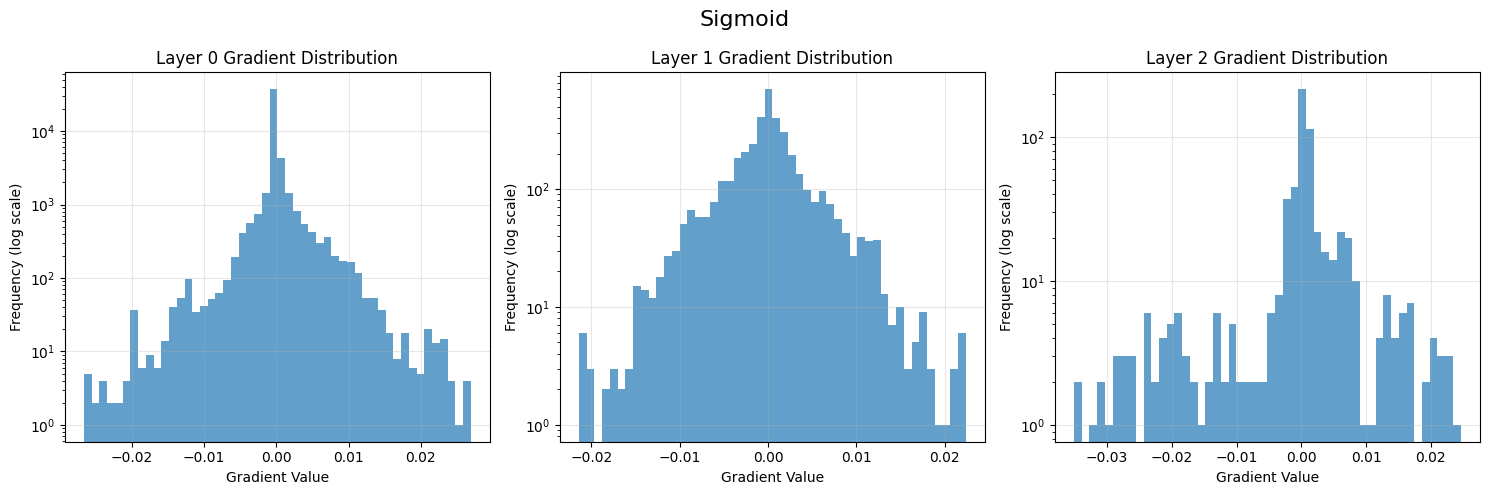

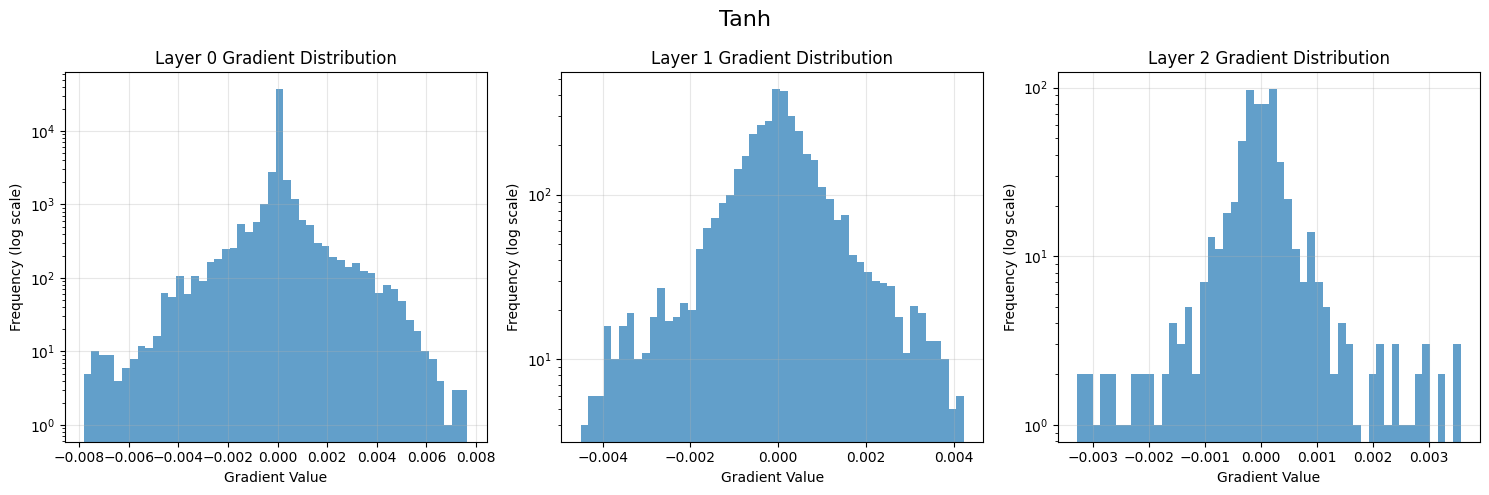

In [46]:
model_test_1_effect_of_activation_function.plot_gradient_distribution(title='Linear')
model_test_2_effect_of_activation_function.plot_gradient_distribution(title='ReLu')
model_test_3_effect_of_activation_function.plot_gradient_distribution(title='Sigmoid')
model_test_4_effect_of_activation_function.plot_gradient_distribution(title='Tanh')

##### Conclusion - Effect of activation function

Based on our experiments across models with different activation functions, we found that different activation functions impact the model's performance. Our visualizations revealed four key findings:

1. Final Prediction (Validation Accuracy):
    - ReLU: 97.64%
    - Tanh: 97.58%
    - Sigmoid: 96.8%
    - Linear: 92.28%

2. Training Loss Patterns:
    - ReLU and Tanh show similar training loss curves, both demonstrating efficient learning (starting at 0.4-0.5 and rapidly decreasing)
    - Sigmoid showed slower initial learning, but eventually reached good performance
    - Linear demonstrated erratic and unstable learning curves with significant fluctuations

3. Weight Distribution:
    - Sigmoid developed the widest weight distribution, it is evident if you observe the output layer
    - ReLU and Tanh showed similar, more moderate weight distributions, with Tanh having a slightly wider spread in the output layer
    - Linear maintained the narrowest weight distribution, concentrated around zero

4. Gradient Distribution:
    - Linear have very large gradients, causing it to have an unstable learning
    - Sigmoid exhibited signs of vanishing gradients (as shown in the graphs, gradients became increasingly concentrated around zero in deeper layers)
    - ReLU and Tanh maintained balanced gradient magnitudes across layers

The superior performance of ReLU and Tanh can be attributed to their ability to maintain healthy gradient while providing sufficient diversity. Their balanced gradient distributions, appropriate weight distribution, and smooth, efficient learning curves contributed to their higher performance. 
Sigmoid's slightly lower performance comes from its vanishing gradients, while Linear's poor performance confirms is caused by the linearity that it shows in its graphs.

### 3. Effect of learning rate

#### Effect of learning rate
- 2 hidden layers
- 64 neurons per layer
- Test 1 : learning rate 0.01
- Test 2 : learning rate 0.05
- Test 3 : learning rate 0.25

##### Test 1 - Learning Rate 0.01

In [84]:
model_test_1_effect_of_learning_rate = NeuralNetwork('categorical_cross_entropy')
model_test_1_effect_of_learning_rate.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_1_effect_of_learning_rate.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_1_effect_of_learning_rate.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_1_effect_of_learning_rate = model_test_1_effect_of_learning_rate.train(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    learning_rate=0.01,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/100 - 2.29s - loss: 1.0818 - accuracy: 0.8730 - val_loss: 0.4706 - val_accuracy: 0.8778
[=================================================>] 100%
Epoch 2/100 - 2.24s - loss: 0.4027 - accuracy: 0.9001 - val_loss: 0.3362 - val_accuracy: 0.9054
[=================================================>] 100%
Epoch 3/100 - 2.33s - loss: 0.3257 - accuracy: 0.9110 - val_loss: 0.2952 - val_accuracy: 0.9154
[=================================================>] 100%
Epoch 4/100 - 2.37s - loss: 0.2899 - accuracy: 0.9204 - val_loss: 0.2702 - val_accuracy: 0.9216
[=================================================>] 100%
Epoch 5/100 - 2.36s - loss: 0.2663 - accuracy: 0.9276 - val_loss: 0.2469 - val_accuracy: 0.9274
[=================================================>] 100%
Epoch 6/100 - 2.44s - loss: 0.2464 - accuracy: 0.9303 - val_loss: 0.2356 - val_accuracy: 0.9319
[=================================================>] 100%
Epoch 7/100 - 2.79

In [85]:
predictions_test_1_effect_of_learning_rate = model_test_1_effect_of_learning_rate.predict(X_test)
pred_classes_test_1_effect_of_learning_rate = np.argmax(predictions_test_1_effect_of_learning_rate, axis=1)
accuracy_test_1_effect_of_learning_rate = accuracy_score(pred_classes_test_1_effect_of_learning_rate, y_test)
print("Test Accuracy:", accuracy_test_1_effect_of_learning_rate)

Test Accuracy: 0.975


##### Test 2 - Learning Rate 0.05

In [86]:
model_test_2_effect_of_learning_rate = NeuralNetwork('categorical_cross_entropy')
model_test_2_effect_of_learning_rate.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_2_effect_of_learning_rate.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_2_effect_of_learning_rate.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_2_effect_of_learning_rate = model_test_2_effect_of_learning_rate.train(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/100 - 2.45s - loss: 0.6743 - accuracy: 0.9027 - val_loss: 0.3273 - val_accuracy: 0.9074
[=================================================>] 100%
Epoch 2/100 - 2.60s - loss: 0.2920 - accuracy: 0.9240 - val_loss: 0.2519 - val_accuracy: 0.9277
[=================================================>] 100%
Epoch 3/100 - 2.66s - loss: 0.2398 - accuracy: 0.9317 - val_loss: 0.2308 - val_accuracy: 0.9315
[=================================================>] 100%
Epoch 4/100 - 2.62s - loss: 0.2047 - accuracy: 0.9457 - val_loss: 0.1933 - val_accuracy: 0.9424
[=================================================>] 100%
Epoch 5/100 - 2.58s - loss: 0.1797 - accuracy: 0.9516 - val_loss: 0.1696 - val_accuracy: 0.9493
[=================================================>] 100%
Epoch 6/100 - 3.06s - loss: 0.1606 - accuracy: 0.9567 - val_loss: 0.1565 - val_accuracy: 0.9530
[=================================================>] 100%
Epoch 7/100 - 3.40

In [87]:
predictions_test_2_effect_of_learning_rate = model_test_2_effect_of_learning_rate.predict(X_test)
pred_classes_test_2_effect_of_learning_rate = np.argmax(predictions_test_2_effect_of_learning_rate, axis=1)
accuracy_test_2_effect_of_learning_rate = accuracy_score(pred_classes_test_2_effect_of_learning_rate, y_test)
print("Test Accuracy:", accuracy_test_2_effect_of_learning_rate)

Test Accuracy: 0.9764


##### Test 3 - Learning Rate 0.25

In [88]:
model_test_3_effect_of_learning_rate = NeuralNetwork('categorical_cross_entropy')
model_test_3_effect_of_learning_rate.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_3_effect_of_learning_rate.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_3_effect_of_learning_rate.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_3_effect_of_learning_rate = model_test_3_effect_of_learning_rate.train(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    learning_rate=0.25,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/100 - 2.89s - loss: 0.2983 - accuracy: 0.9501 - val_loss: 0.1712 - val_accuracy: 0.9467
[=================================================>] 100%
Epoch 2/100 - 2.88s - loss: 0.1298 - accuracy: 0.9695 - val_loss: 0.1178 - val_accuracy: 0.9656
[=================================================>] 100%
Epoch 3/100 - 3.07s - loss: 0.0950 - accuracy: 0.9789 - val_loss: 0.1016 - val_accuracy: 0.9697
[=================================================>] 100%
Epoch 4/100 - 3.04s - loss: 0.0746 - accuracy: 0.9720 - val_loss: 0.1331 - val_accuracy: 0.9589
[=================================================>] 100%
Epoch 5/100 - 3.12s - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.1066 - val_accuracy: 0.9666
[=================================================>] 100%
Epoch 6/100 - 3.93s - loss: 0.0537 - accuracy: 0.9858 - val_loss: 0.0923 - val_accuracy: 0.9727
[=================================================>] 100%
Epoch 7/100 - 2.99

In [93]:
predictions_test_3_effect_of_learning_rate = model_test_3_effect_of_learning_rate.predict(X_test)
pred_classes_test_3_effect_of_learning_rate = np.argmax(predictions_test_3_effect_of_learning_rate, axis=1)
accuracy_test_3_effect_of_learning_rate = accuracy_score(pred_classes_test_3_effect_of_learning_rate, y_test)
print("Test Accuracy:", accuracy_test_3_effect_of_learning_rate)

Test Accuracy: 0.9803


##### Effect of learning rate - Training Comparison

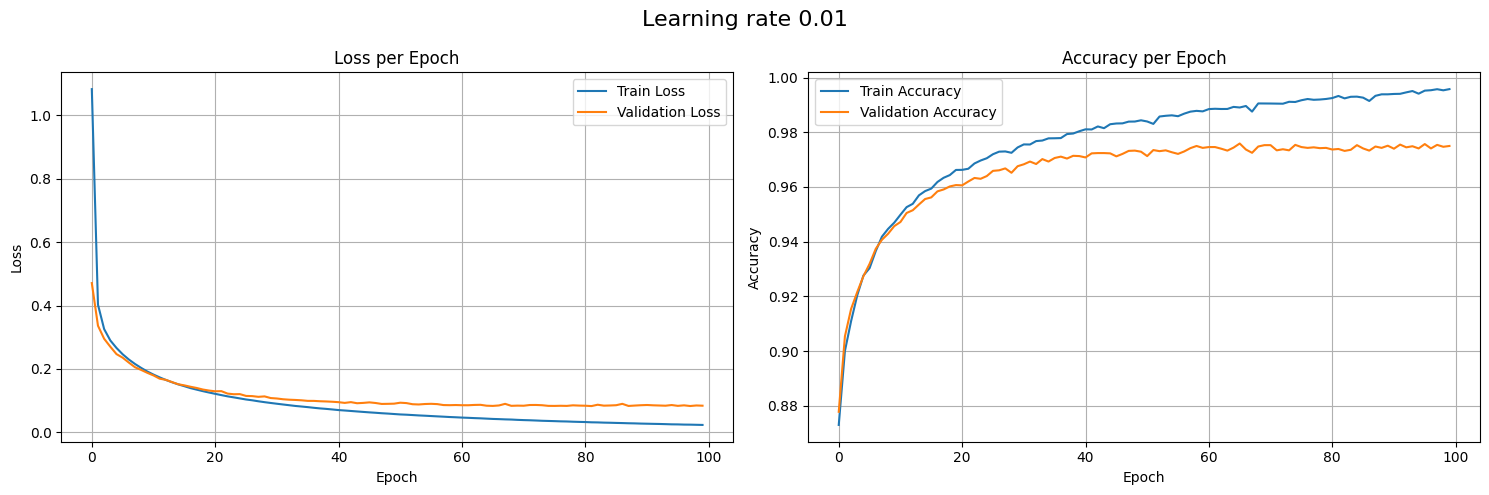

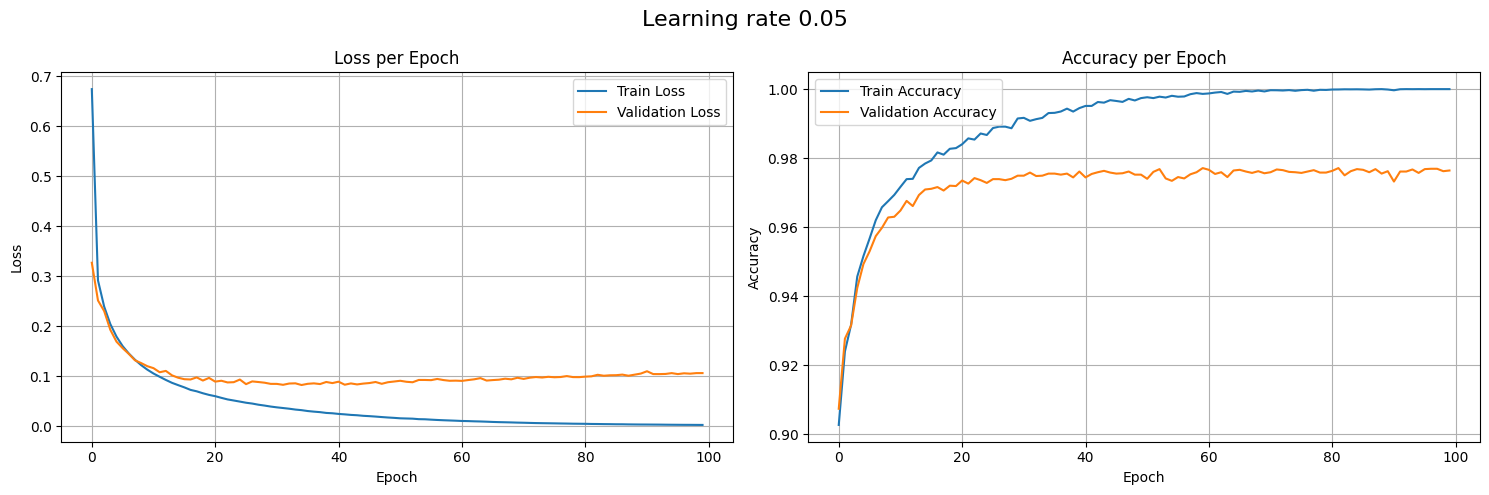

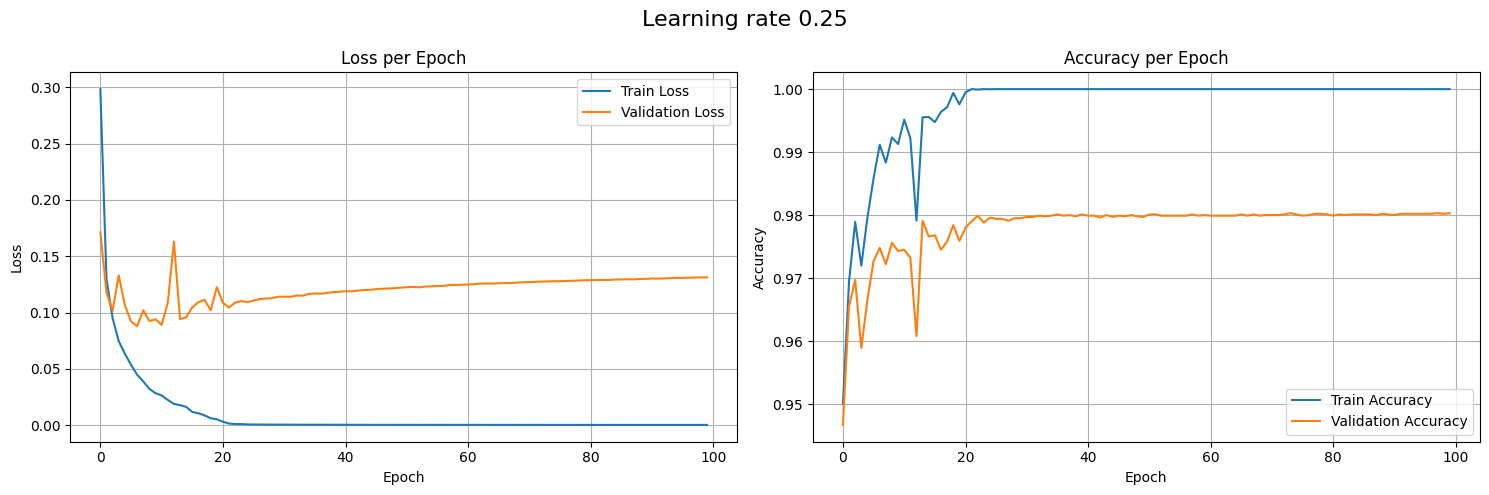

In [94]:
model_test_1_effect_of_learning_rate.plot_training('Learning rate 0.01')
model_test_2_effect_of_learning_rate.plot_training('Learning rate 0.05')
model_test_3_effect_of_learning_rate.plot_training('Learning rate 0.25')

##### Effect of learning rate - Weight Distribution Comparison

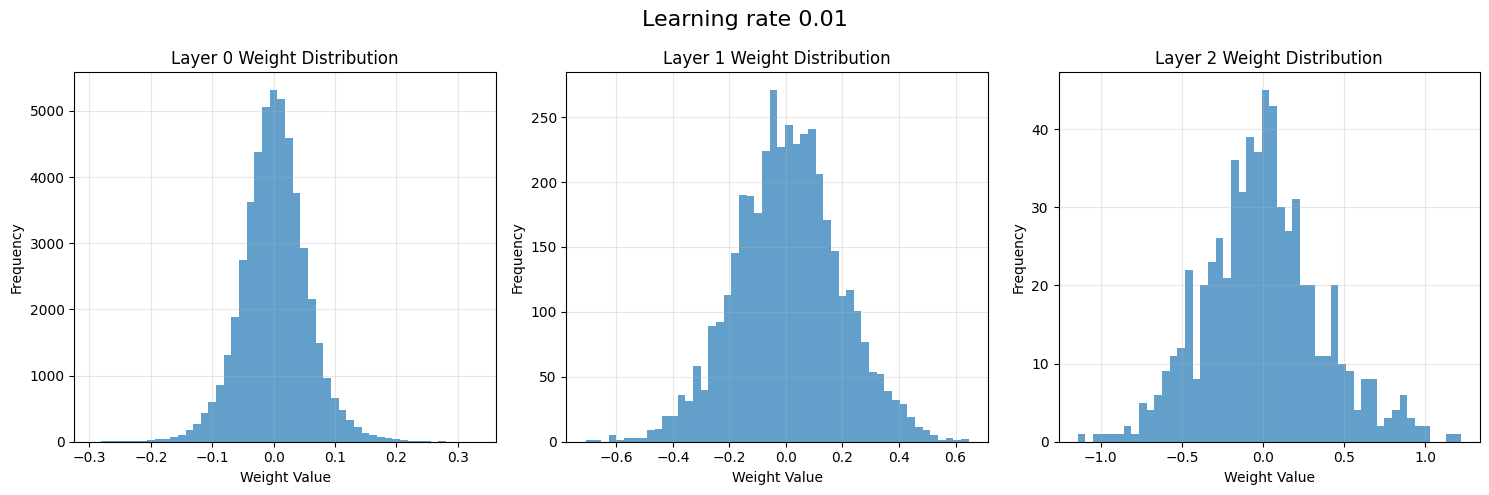

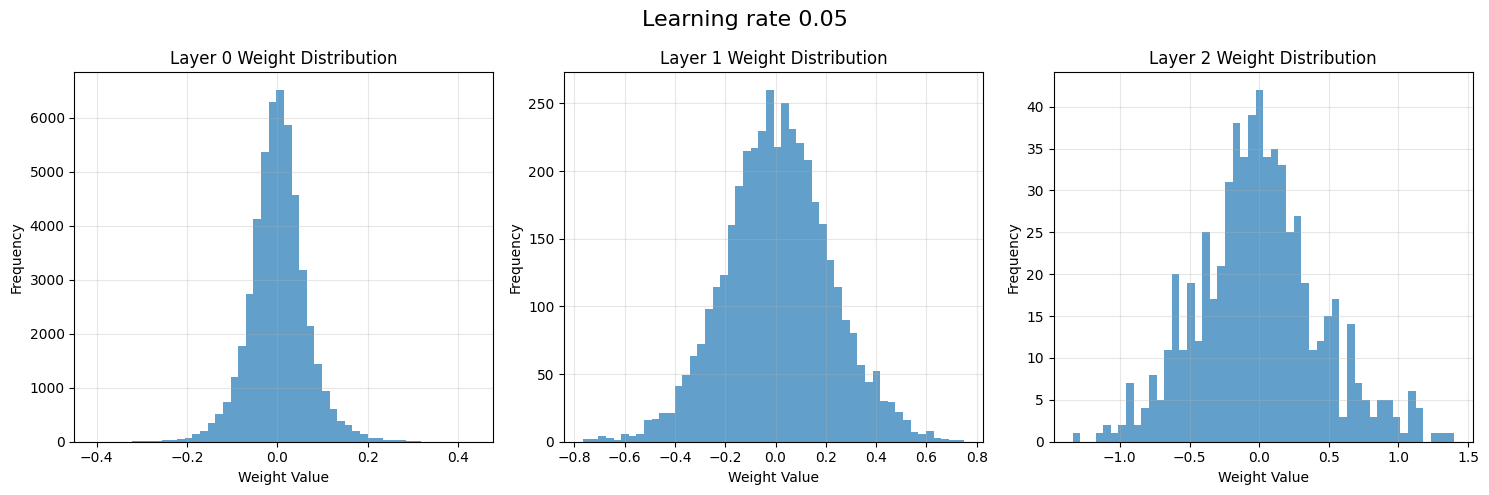

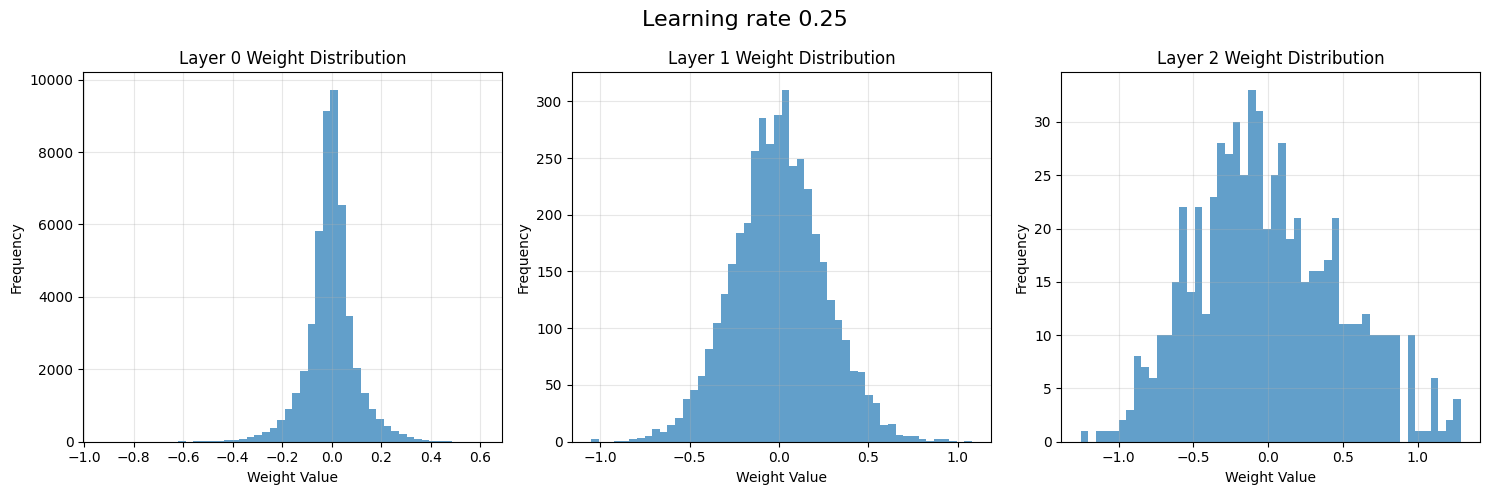

In [95]:
model_test_1_effect_of_learning_rate.plot_weight_distribution(title='Learning rate 0.01')
model_test_2_effect_of_learning_rate.plot_weight_distribution(title='Learning rate 0.05')
model_test_3_effect_of_learning_rate.plot_weight_distribution(title='Learning rate 0.25')

##### Effect of learning rate - Gradient Distribution Comparison

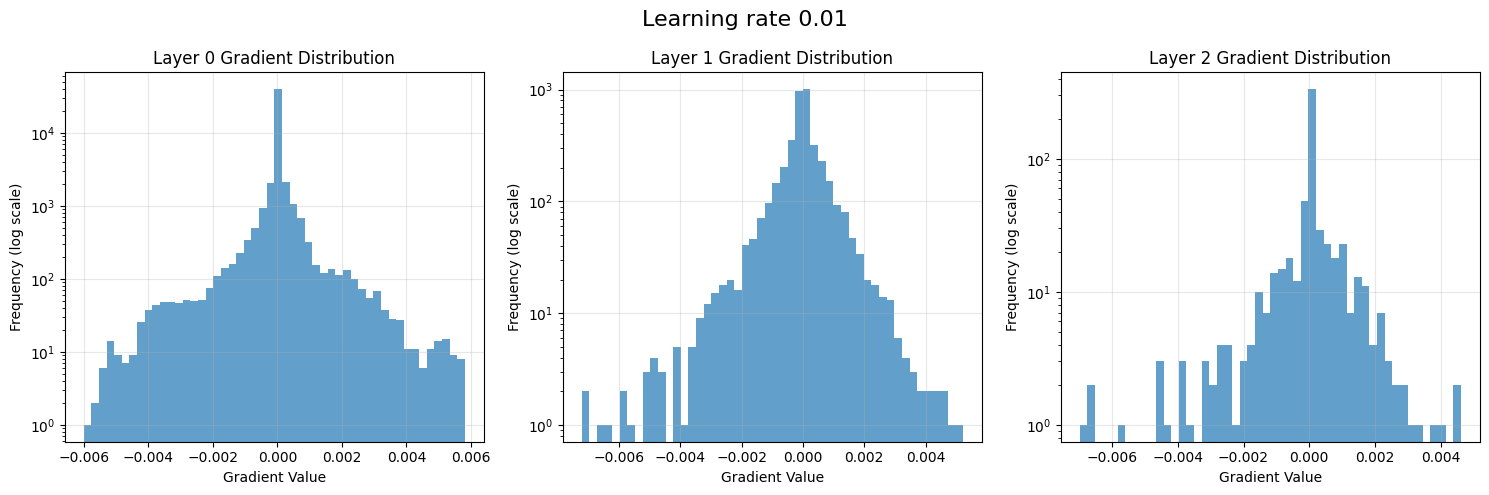

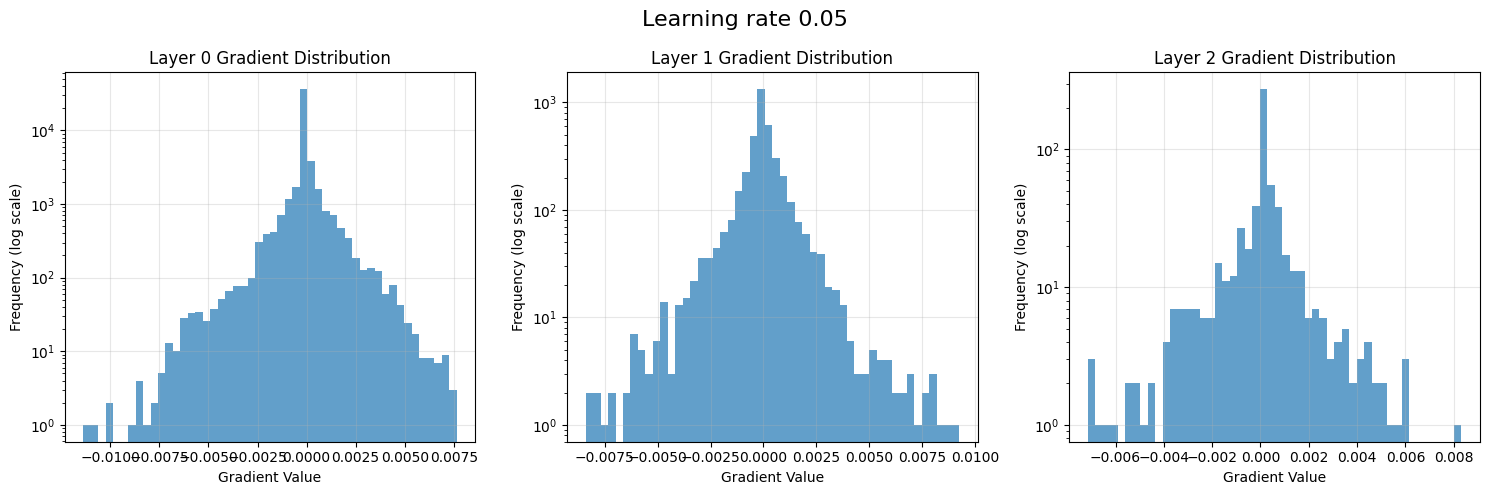

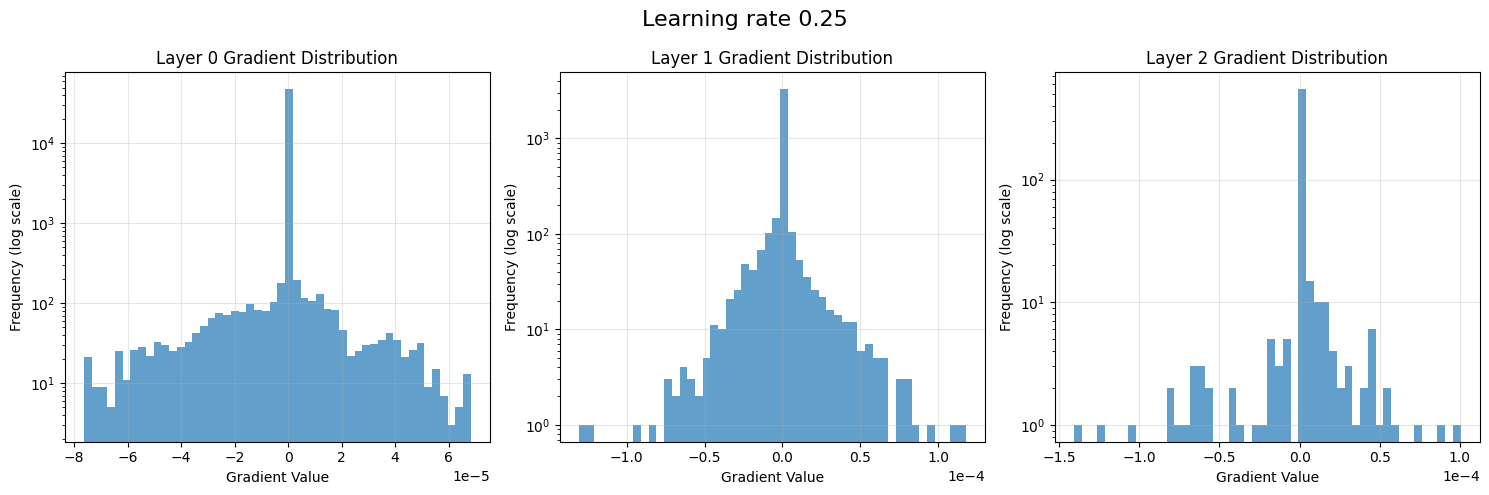

In [96]:
model_test_1_effect_of_learning_rate.plot_gradient_distribution(title='Learning rate 0.01')
model_test_2_effect_of_learning_rate.plot_gradient_distribution(title='Learning rate 0.05')
model_test_3_effect_of_learning_rate.plot_gradient_distribution(title='Learning rate 0.25')

##### Conclusion - Effect of learning rate

Based on our experiments across models with different learning rates, we found that learning rates impact the model's performance, convergence patterns, and final performance. Our visualizations revealed four key findings:
1. Final Prediction Accuracy :
    - Learning rate 0.01 : 97.50%
    - Learning rate 0.05 : 97.64%
    - Learning rate 0.25 : 98.03%

2. Training loss patterns : 
    - Learning rate 0.01 : Slow and steady convergence with minimal spikes/fluctuations
    - Learning rate 0.05 : Faster convergence, but maintaining stability
    - Learning rate 0.25 : Fastest convergence, unstable at first but then stabilizing

3. Weight Distribution : 
    - Higher learning rates shows more concentrated weight distribution (observe weight distribution for learning rate 0.25, weight distribution at input layer concentrates at 0)
    - Weight distributions becomes wider in deeper layers

4. Gradient Distribution : 
    - Learning rate 0.01 : High gradients(-0.006, 0.006)
    - Learning rate 0.05 : High gradients (-0.006, 0.008)
    - learning rate 0.25 : Low gradient (1e-4)

This experiment shows that lower learning rate doesn't always mean higher accuracy. Learning rate 0.25 likely performed better becaause it allows and helps the model avoid getting stuck in local minima more effectively, it also maintains smaller gradients therefore  maintaining appropriate update sizes.



### 4. Effect of weight initialization

#### Weight initialization with various types : 
- 2 hidden layers
- 64 neurons per layer
- Test 1 : Zero initialization
- Test 2 : Uniform initialization
- Test 3 : Normal initialization
- Test 4 : Xavier initialization
- Test 5 : He initialization

##### Test 1 - Zero initialization

In [99]:
model_test_1_effect_of_weight_initialization = NeuralNetwork('categorical_cross_entropy')
model_test_1_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Zero"))
model_test_1_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Zero"))
model_test_1_effect_of_weight_initialization.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Zero"))

history_test_1_effect_of_weight_initialization = model_test_1_effect_of_weight_initialization.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.01,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.51s - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
[=================================================>] 100%
Epoch 2/50 - 2.57s - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
[=================================================>] 100%
Epoch 3/50 - 3.11s - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
[=================================================>] 100%
Epoch 4/50 - 2.99s - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
[=================================================>] 100%
Epoch 5/50 - 3.27s - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
[=================================================>] 100%
Epoch 6/50 - 3.12s - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
[=================================================>] 100%
Epoch 7/50 - 3.08s - los

In [100]:
predictions_test_1_effect_of_weight_initialization = model_test_1_effect_of_weight_initialization.predict(X_test)
pred_classes_test_1_effect_of_weight_initialization = np.argmax(predictions_test_1_effect_of_weight_initialization, axis=1)
accuracy_test_1_effect_of_weight_initialization = accuracy_score(pred_classes_test_1_effect_of_weight_initialization, y_test)
print("Test Accuracy:", accuracy_test_1_effect_of_weight_initialization)

Test Accuracy: 0.1135


##### Test 2 - Uniform initialization

In [101]:
model_test_2_effect_of_weight_initialization = NeuralNetwork('categorical_cross_entropy')
model_test_2_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="uniform"))
model_test_2_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="uniform"))
model_test_2_effect_of_weight_initialization.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="uniform"))

history_test_2_effect_of_weight_initialization = model_test_2_effect_of_weight_initialization.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.01,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.44s - loss: 1.0461 - accuracy: 0.8218 - val_loss: 0.5636 - val_accuracy: 0.8316
[=================================================>] 100%
Epoch 2/50 - 2.53s - loss: 0.5145 - accuracy: 0.8634 - val_loss: 0.4409 - val_accuracy: 0.8726
[=================================================>] 100%
Epoch 3/50 - 3.51s - loss: 0.4209 - accuracy: 0.8801 - val_loss: 0.3917 - val_accuracy: 0.8851
[=================================================>] 100%
Epoch 4/50 - 2.63s - loss: 0.3677 - accuracy: 0.8972 - val_loss: 0.3452 - val_accuracy: 0.8974
[=================================================>] 100%
Epoch 5/50 - 2.68s - loss: 0.3324 - accuracy: 0.9057 - val_loss: 0.3203 - val_accuracy: 0.9020
[=================================================>] 100%
Epoch 6/50 - 4.42s - loss: 0.3058 - accuracy: 0.9112 - val_loss: 0.3015 - val_accuracy: 0.9083
[=================================================>] 100%
Epoch 7/50 - 2.92s - los

In [102]:
predictions_test_2_effect_of_weight_initialization = model_test_2_effect_of_weight_initialization.predict(X_test)
pred_classes_test_2_effect_of_weight_initialization = np.argmax(predictions_test_2_effect_of_weight_initialization, axis=1)
accuracy_test_2_effect_of_weight_initialization = accuracy_score(pred_classes_test_2_effect_of_weight_initialization, y_test)
print("Test Accuracy:", accuracy_test_2_effect_of_weight_initialization)

Test Accuracy: 0.9559


##### Test 3 - Normal initialization

In [117]:
model_test_3_effect_of_weight_initialization = NeuralNetwork('categorical_cross_entropy')
model_test_3_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="normal", var=1.0/64))
model_test_3_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="normal", var=1.0/64))
model_test_3_effect_of_weight_initialization.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="normal", var=1.0/64))

history_test_3_effect_of_weight_initialization = model_test_3_effect_of_weight_initialization.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.01,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.58s - loss: 1.0425 - accuracy: 0.8486 - val_loss: 0.5111 - val_accuracy: 0.8519
[=================================================>] 100%
Epoch 2/50 - 2.41s - loss: 0.4404 - accuracy: 0.8876 - val_loss: 0.3720 - val_accuracy: 0.8924
[=================================================>] 100%
Epoch 3/50 - 2.37s - loss: 0.3563 - accuracy: 0.9023 - val_loss: 0.3233 - val_accuracy: 0.9059
[=================================================>] 100%
Epoch 4/50 - 2.59s - loss: 0.3141 - accuracy: 0.9129 - val_loss: 0.2959 - val_accuracy: 0.9129
[=================================================>] 100%
Epoch 5/50 - 2.61s - loss: 0.2864 - accuracy: 0.9202 - val_loss: 0.2693 - val_accuracy: 0.9209
[=================================================>] 100%
Epoch 6/50 - 2.73s - loss: 0.2643 - accuracy: 0.9227 - val_loss: 0.2590 - val_accuracy: 0.9238
[=================================================>] 100%
Epoch 7/50 - 2.96s - los

In [118]:
predictions_test_3_effect_of_weight_initialization = model_test_3_effect_of_weight_initialization.predict(X_test)
pred_classes_test_3_effect_of_weight_initialization = np.argmax(predictions_test_3_effect_of_weight_initialization, axis=1)
accuracy_test_3_effect_of_weight_initialization = accuracy_score(pred_classes_test_3_effect_of_weight_initialization, y_test)
print("Test Accuracy:", accuracy_test_3_effect_of_weight_initialization)

Test Accuracy: 0.9692


##### Test 4 - Xavier initialization

In [105]:
model_test_4_effect_of_weight_initialization = NeuralNetwork('categorical_cross_entropy')
model_test_4_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_4_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_4_effect_of_weight_initialization.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_4_effect_of_weight_initialization = model_test_4_effect_of_weight_initialization.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.01,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.46s - loss: 1.0826 - accuracy: 0.8712 - val_loss: 0.4734 - val_accuracy: 0.8767
[=================================================>] 100%
Epoch 2/50 - 2.29s - loss: 0.4032 - accuracy: 0.8998 - val_loss: 0.3366 - val_accuracy: 0.9053
[=================================================>] 100%
Epoch 3/50 - 2.40s - loss: 0.3263 - accuracy: 0.9104 - val_loss: 0.2963 - val_accuracy: 0.9142
[=================================================>] 100%
Epoch 4/50 - 2.33s - loss: 0.2904 - accuracy: 0.9200 - val_loss: 0.2708 - val_accuracy: 0.9214
[=================================================>] 100%
Epoch 5/50 - 2.36s - loss: 0.2667 - accuracy: 0.9271 - val_loss: 0.2476 - val_accuracy: 0.9274
[=================================================>] 100%
Epoch 6/50 - 2.34s - loss: 0.2468 - accuracy: 0.9300 - val_loss: 0.2362 - val_accuracy: 0.9320
[=================================================>] 100%
Epoch 7/50 - 2.39s - los

In [106]:
predictions_test_4_effect_of_weight_initialization = model_test_4_effect_of_weight_initialization.predict(X_test)
pred_classes_test_4_effect_of_weight_initialization = np.argmax(predictions_test_4_effect_of_weight_initialization, axis=1)
accuracy_test_4_effect_of_weight_initialization = accuracy_score(pred_classes_test_4_effect_of_weight_initialization, y_test)
print("Test Accuracy:", accuracy_test_4_effect_of_weight_initialization)

Test Accuracy: 0.9723


##### Test 5 - He initialization

In [107]:
model_test_5_effect_of_weight_initialization = NeuralNetwork('categorical_cross_entropy')
model_test_5_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="He"))
model_test_5_effect_of_weight_initialization.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="He"))
model_test_5_effect_of_weight_initialization.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="He"))

history_test_5_effect_of_weight_initialization = model_test_5_effect_of_weight_initialization.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.01,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.65s - loss: 0.8038 - accuracy: 0.8871 - val_loss: 0.3905 - val_accuracy: 0.8923
[=================================================>] 100%
Epoch 2/50 - 2.29s - loss: 0.3472 - accuracy: 0.9113 - val_loss: 0.2994 - val_accuracy: 0.9154
[=================================================>] 100%
Epoch 3/50 - 2.27s - loss: 0.2870 - accuracy: 0.9218 - val_loss: 0.2644 - val_accuracy: 0.9254
[=================================================>] 100%
Epoch 4/50 - 2.31s - loss: 0.2528 - accuracy: 0.9315 - val_loss: 0.2386 - val_accuracy: 0.9313
[=================================================>] 100%
Epoch 5/50 - 2.59s - loss: 0.2294 - accuracy: 0.9378 - val_loss: 0.2166 - val_accuracy: 0.9363
[=================================================>] 100%
Epoch 6/50 - 2.51s - loss: 0.2106 - accuracy: 0.9408 - val_loss: 0.2042 - val_accuracy: 0.9404
[=================================================>] 100%
Epoch 7/50 - 2.44s - los

In [108]:
predictions_test_5_effect_of_weight_initialization = model_test_5_effect_of_weight_initialization.predict(X_test)
pred_classes_test_5_effect_of_weight_initialization = np.argmax(predictions_test_5_effect_of_weight_initialization, axis=1)
accuracy_test_5_effect_of_weight_initialization = accuracy_score(pred_classes_test_5_effect_of_weight_initialization, y_test)
print("Test Accuracy:", accuracy_test_5_effect_of_weight_initialization)

Test Accuracy: 0.9728


##### Effect of weight initialization - Training comparison

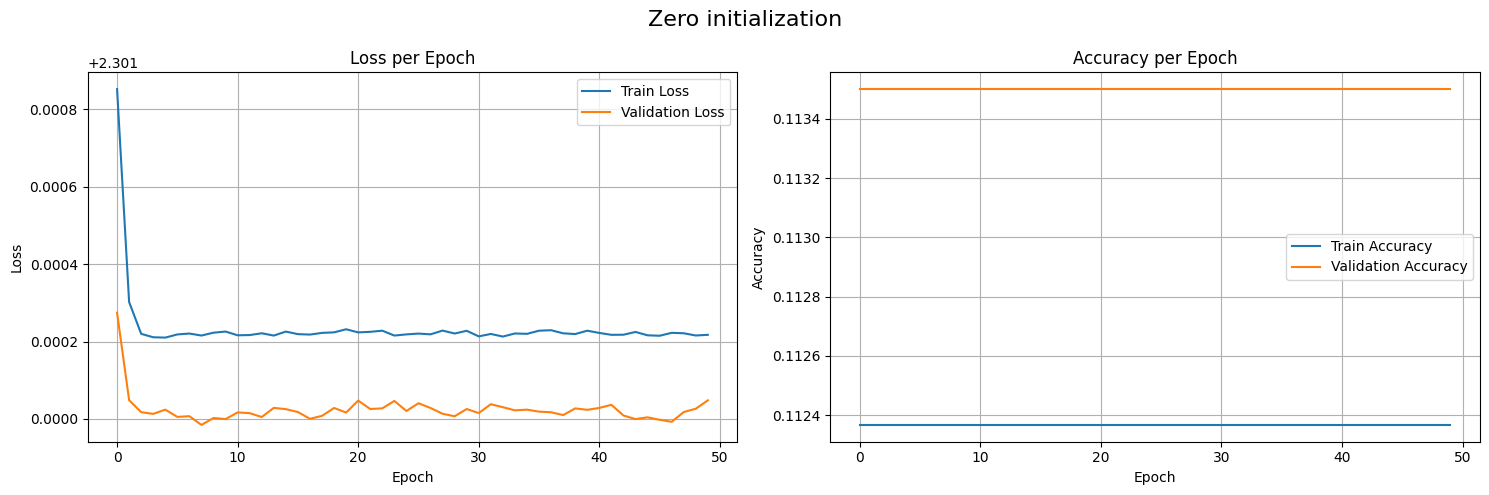

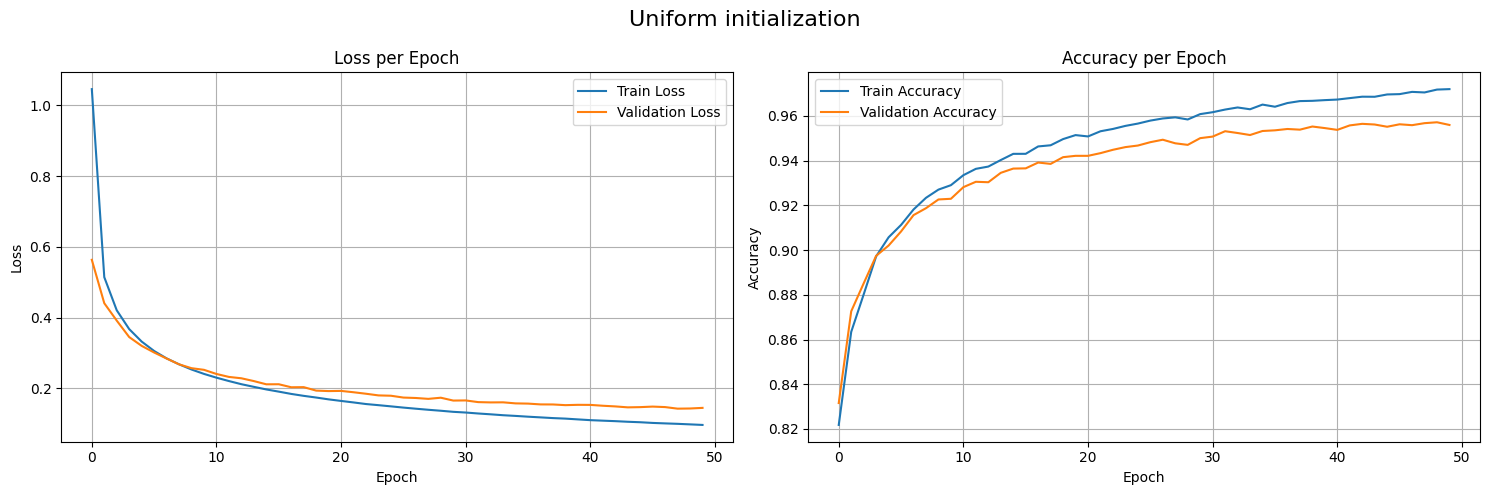

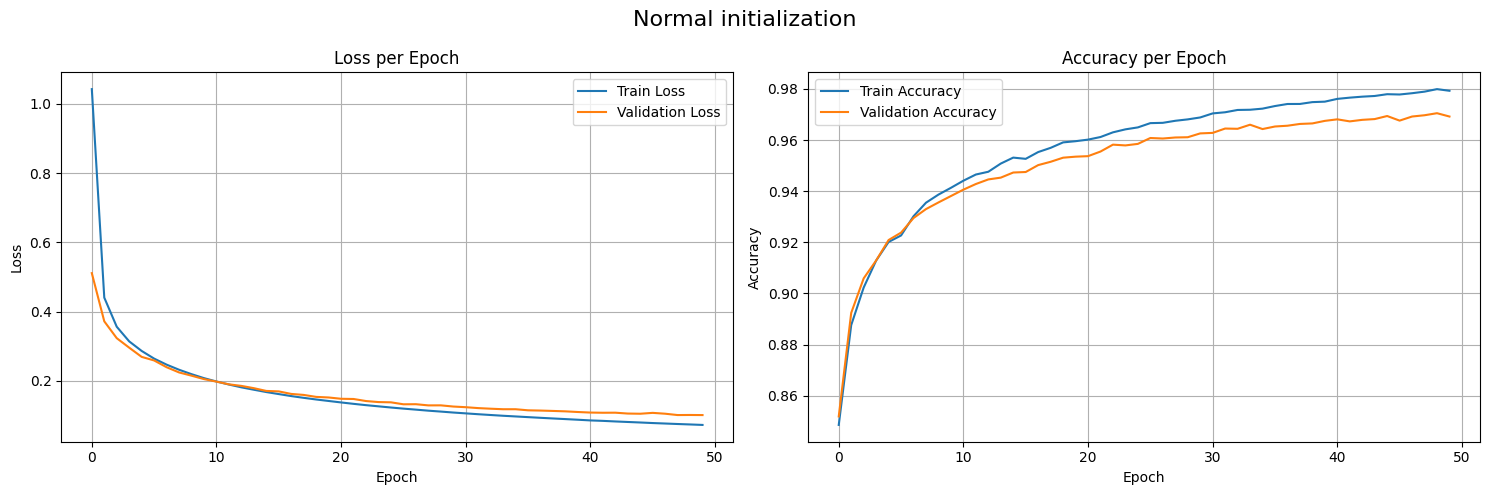

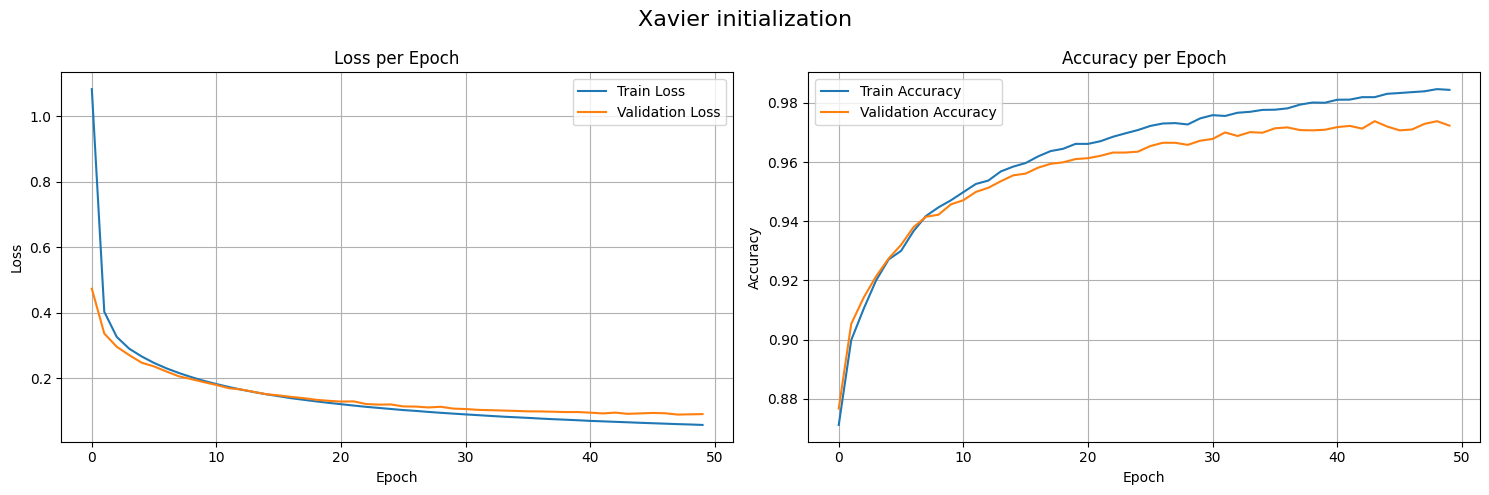

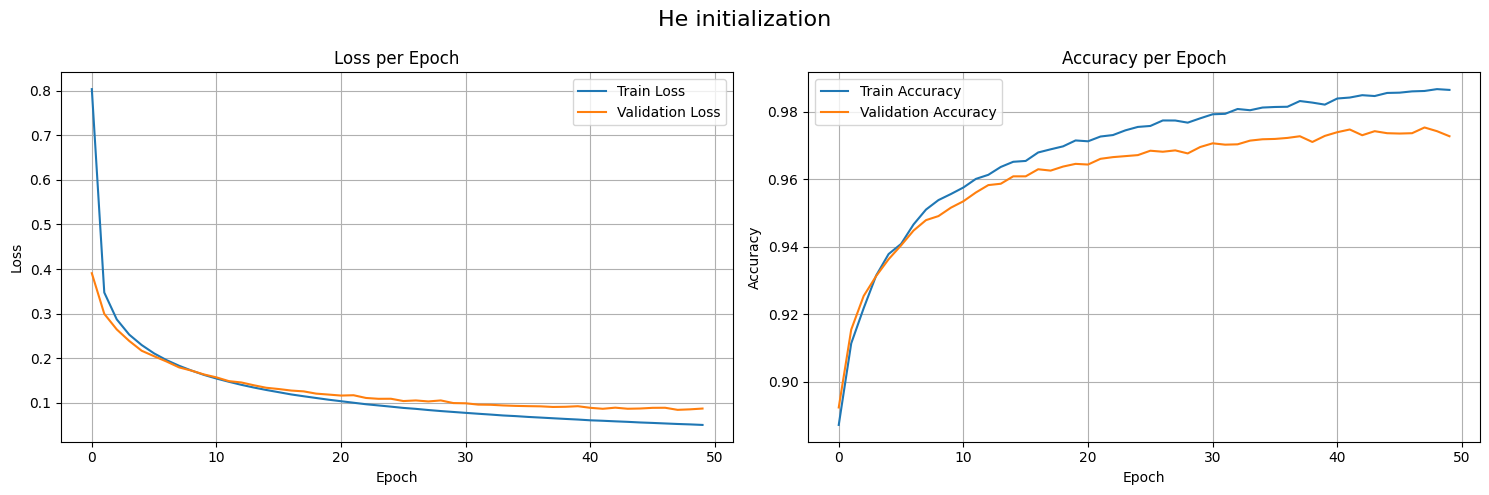

In [119]:
model_test_1_effect_of_weight_initialization.plot_training('Zero initialization')
model_test_2_effect_of_weight_initialization.plot_training('Uniform initialization')
model_test_3_effect_of_weight_initialization.plot_training('Normal initialization')
model_test_4_effect_of_weight_initialization.plot_training('Xavier initialization')
model_test_5_effect_of_weight_initialization.plot_training('He initialization')

##### Effect of weight initialization - Weight distribution comparison

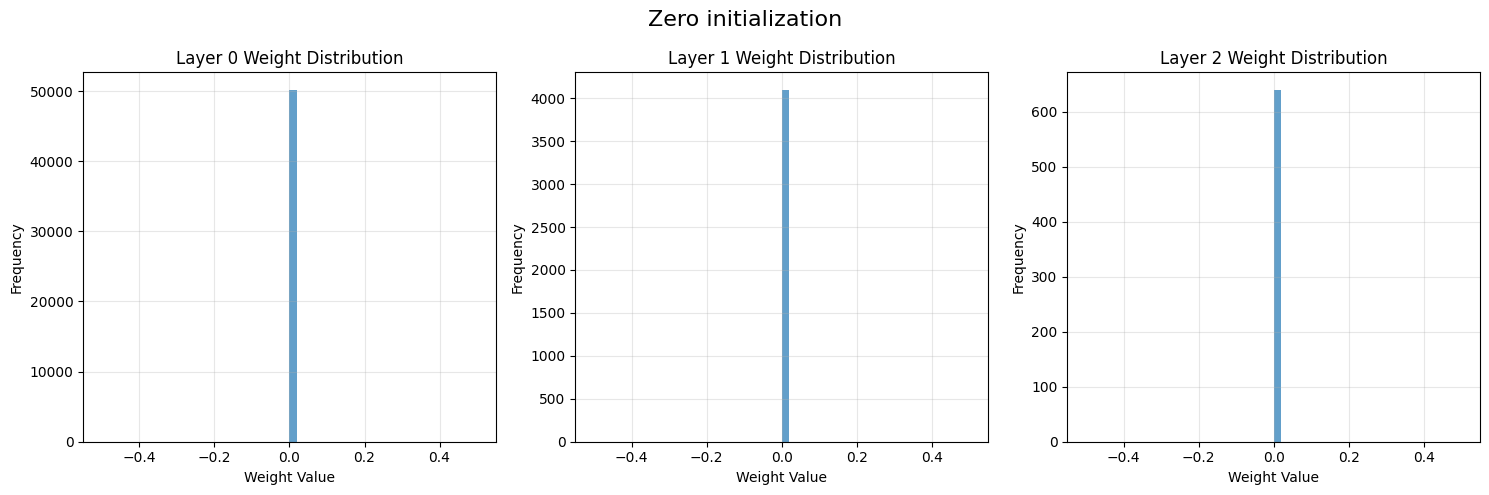

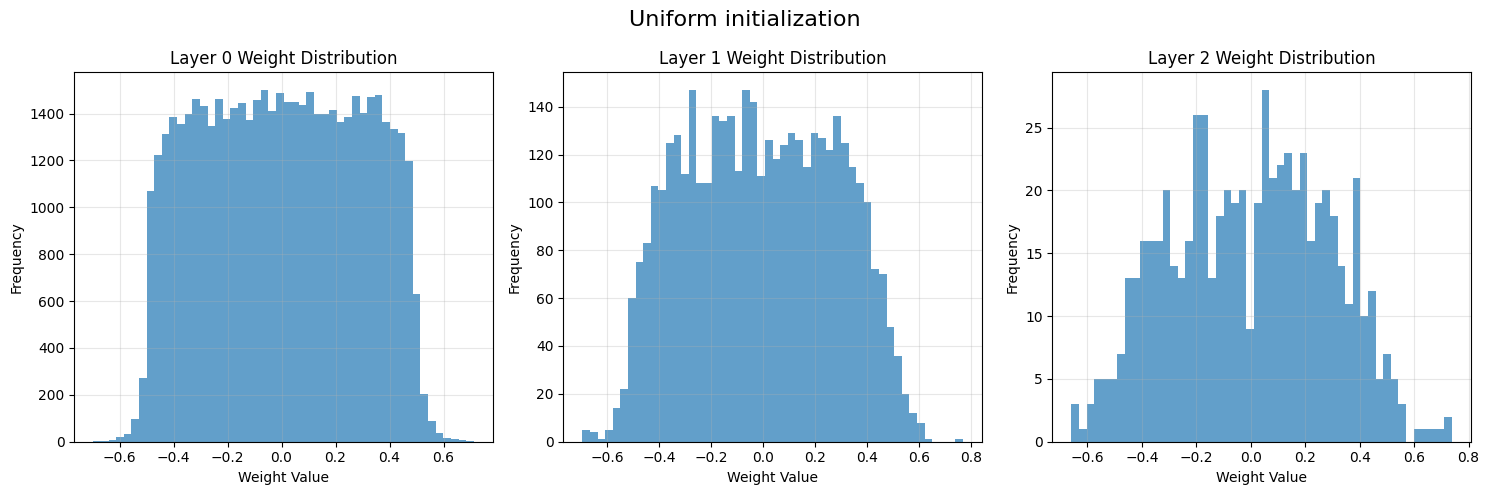

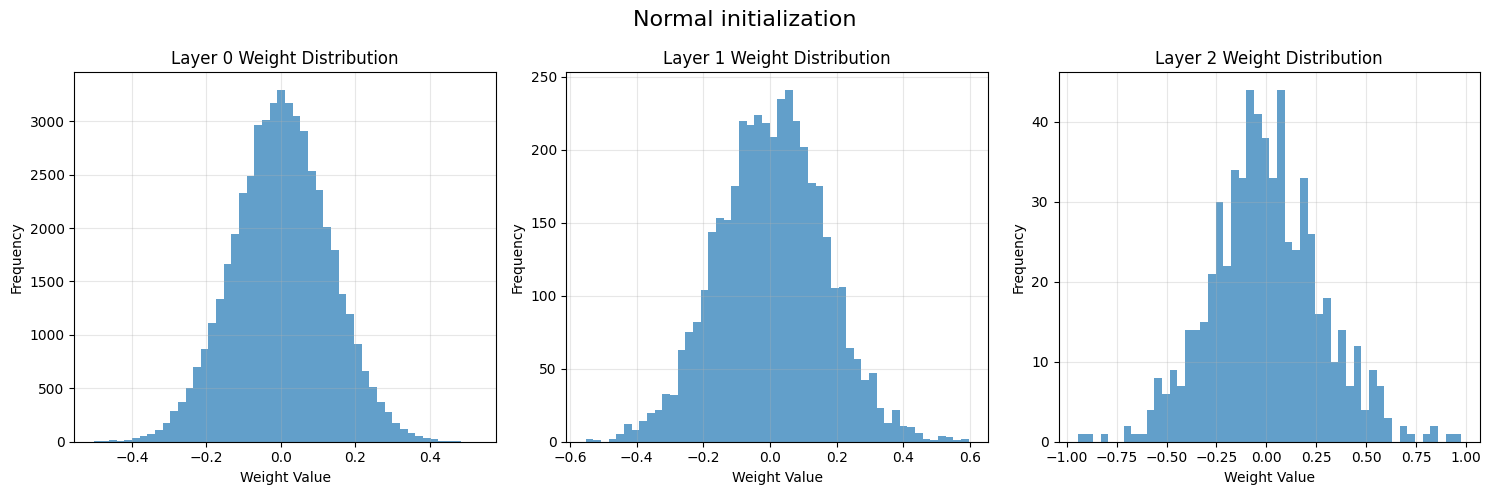

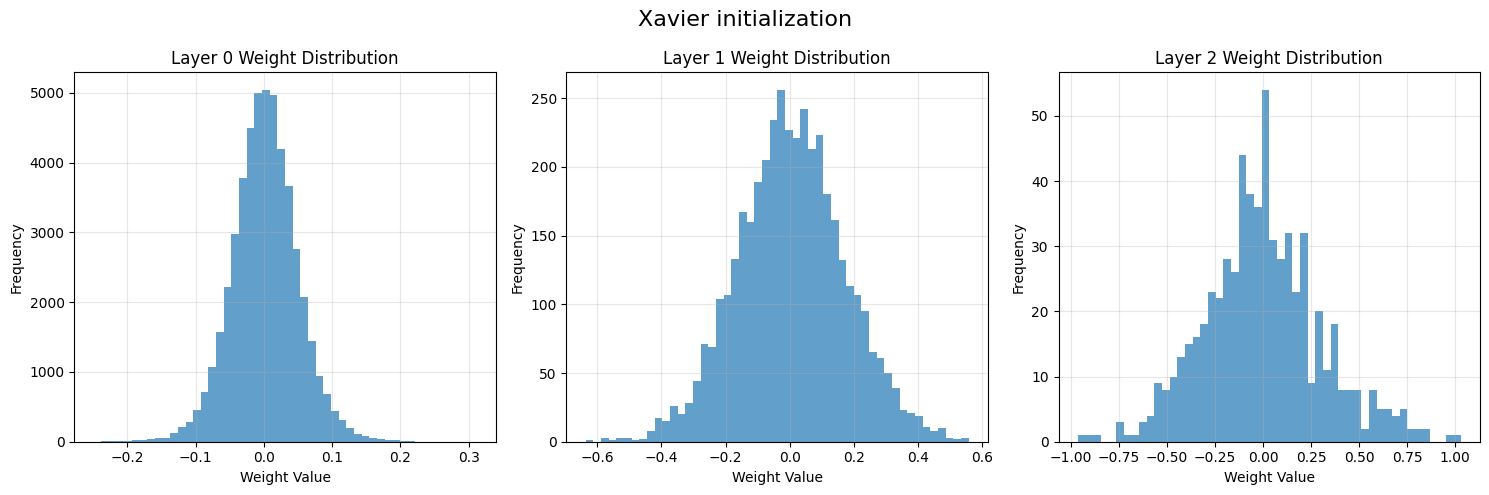

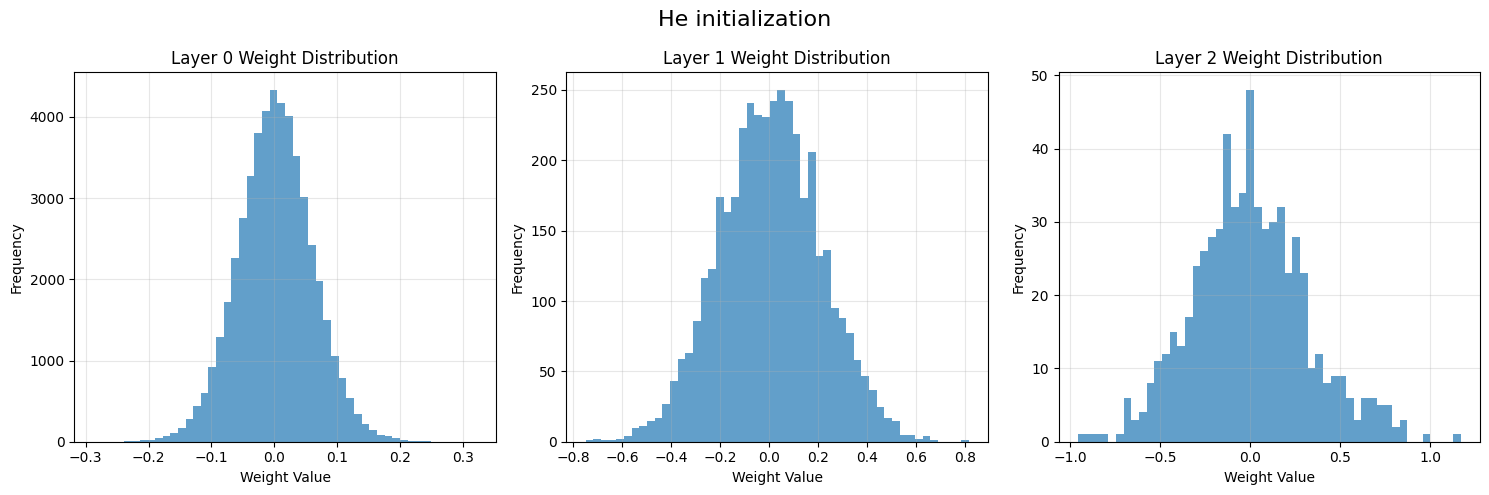

In [120]:
model_test_1_effect_of_weight_initialization.plot_weight_distribution(title='Zero initialization')
model_test_2_effect_of_weight_initialization.plot_weight_distribution(title='Uniform initialization')
model_test_3_effect_of_weight_initialization.plot_weight_distribution(title='Normal initialization')
model_test_4_effect_of_weight_initialization.plot_weight_distribution(title='Xavier initialization')
model_test_5_effect_of_weight_initialization.plot_weight_distribution(title='He initialization')

##### Effect of weight initialization - Gradient distribution comparison

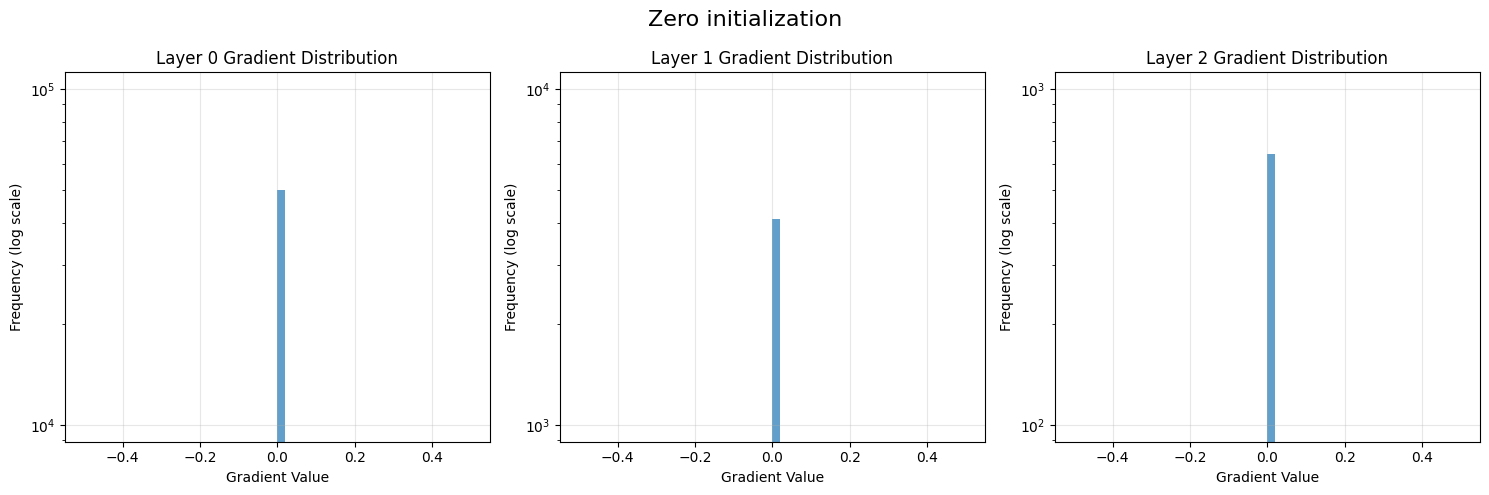

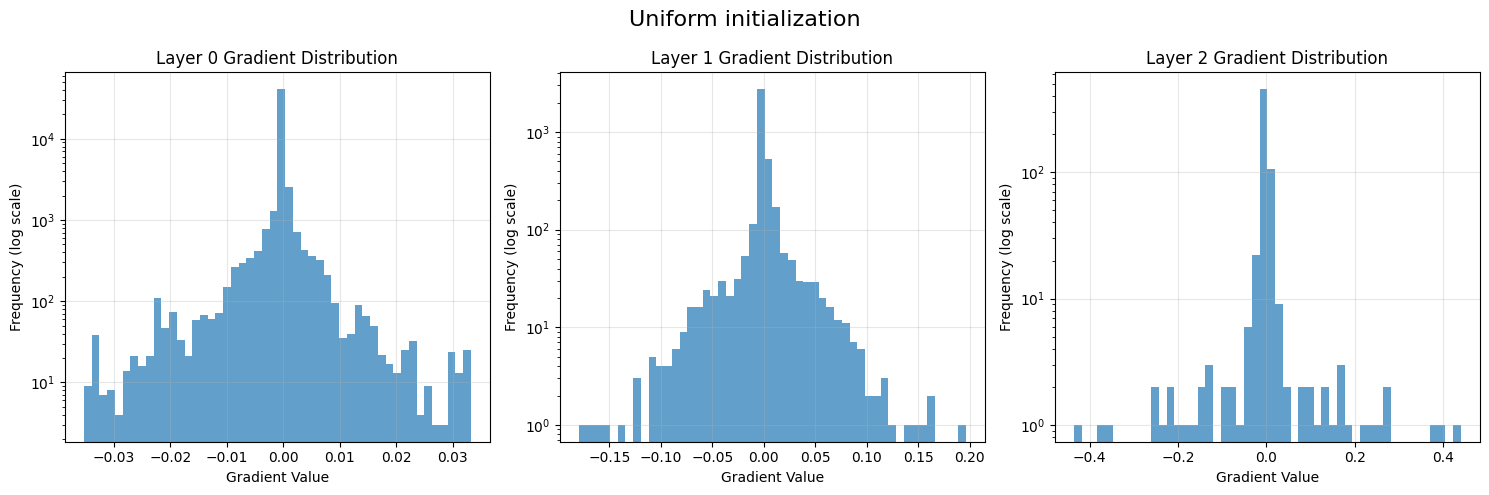

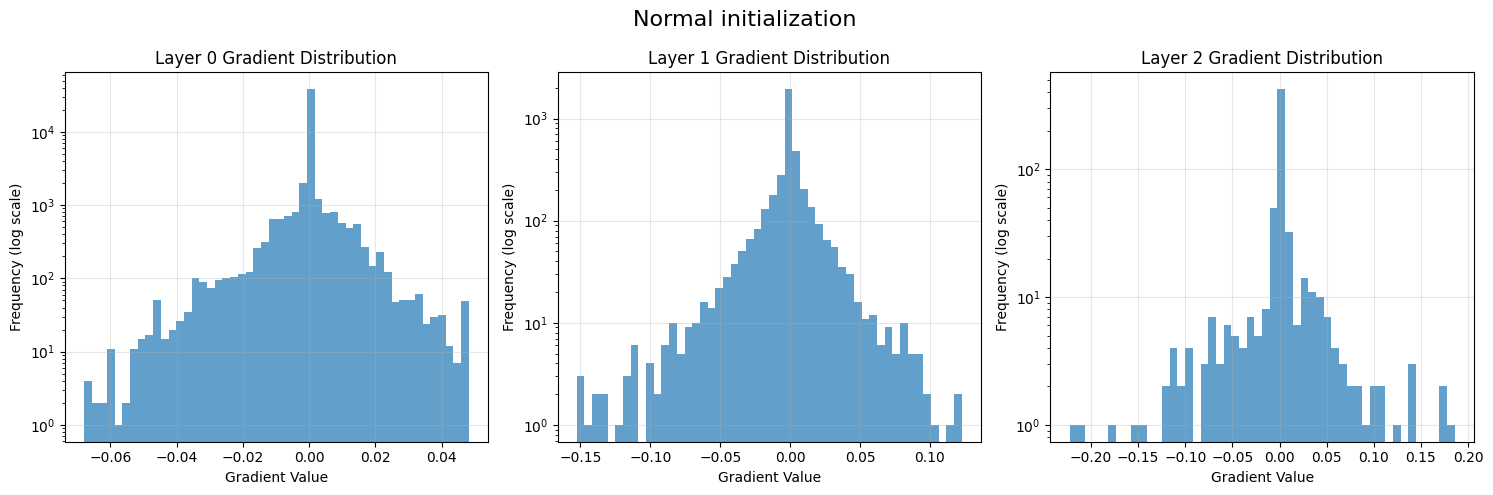

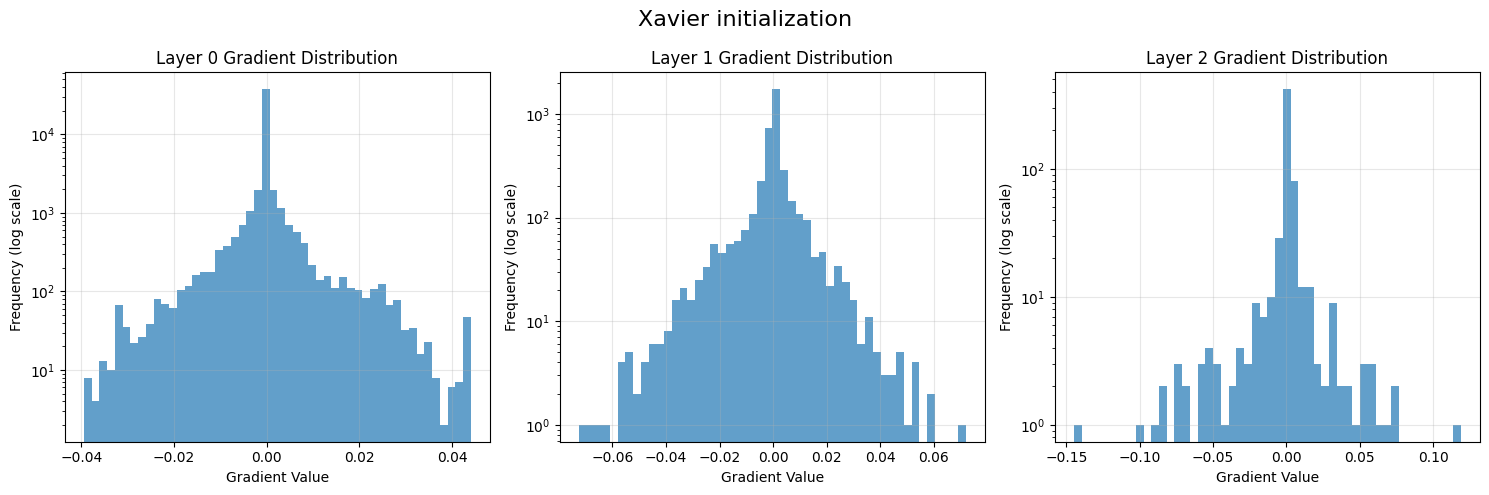

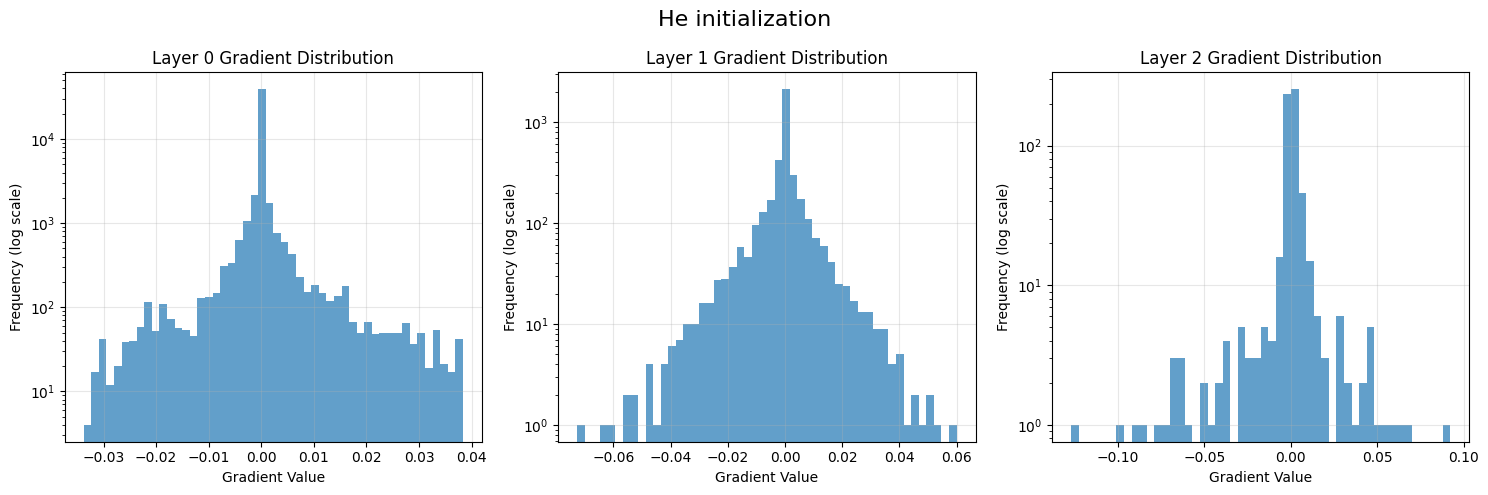

In [121]:
model_test_1_effect_of_weight_initialization.plot_gradient_distribution(title='Zero initialization')
model_test_2_effect_of_weight_initialization.plot_gradient_distribution(title='Uniform initialization')
model_test_3_effect_of_weight_initialization.plot_gradient_distribution(title='Normal initialization')
model_test_4_effect_of_weight_initialization.plot_gradient_distribution(title='Xavier initialization')
model_test_5_effect_of_weight_initialization.plot_gradient_distribution(title='He initialization')

##### Conclusion - Effect of weight initialization

Based on our experiments across models with different weight initializations, we found that the weight initialization impact the model's performance. Our visualizations revealed four key findings:

1. Prediction accuracy : 
    - Zero initialization    : 11.35%
    - Uniform initialization : 95.59%
    - Normal initialization  : 96.92%
    - Xavier initializaion   : 97.23%
    - He initialization      : 97.28%

2. Training loss patterns : 
    - Zero initialization    : minimal learning, immidiately plateau
    - Uniform initialization : Steady impovements, but converges a bit more slowly than xavier
    - Normal initializaion   : smooth convergence, converges faster than uniform initialization, but still slower than xavier
    - Xavier                 : smooth convergence, converges faster than Normal and uniform initialization, but slower than He
    - He                     : Fastest initial convergence, the best performing model

3. Weight distribution
    - Zero initialization    : All weights concentrated at zero
    - Uniform initialization : initially, weight is distributed evenly, but the deeper the layer the more structured the weight distributions are
    - Normal initializaion   : Bell-shaped distributions with increasing variance in deeper layers
    - Xavier                 : Bell shaped that is narrower in early layers, but wider in deeper ones
    - He                     : Similar to Xavier, but slightly wider distributions

4. Gradient distribution
    - Zero initialization    : Concentrated gradient distribution on zero
    - Uniform initialization : Bell shaped gradient and a good distribution of gradients.
    - Normal initializaion   : Bell shaped gradient with the widest range of gradients at the first layer (-0.06, 0.04), the deeper the layer the broader the distribution
    - Xavier                 : Bell shaped gradient with appropriate scaling 
    - He                     : Similar to Xavier but have narrower distributions at deeper layers

This experiment proves that weight initialization impacts neural network training. Zero initialization completely fails as their weights are all zero therefore no diversity, while He initialization performed the best because it's made specifically for ReLU which is the activation function used. Choosing the correct weight initialization according to the activation function makes the model perform better.

## Compare model with sklearn MLP

In [47]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64),activation='relu', 
                    solver='adam', max_iter=20, random_state=1, verbose=True)

mlp.fit(X_train, y_train)

Iteration 1, loss = 0.38125848
Iteration 2, loss = 0.15297148
Iteration 3, loss = 0.10651178
Iteration 4, loss = 0.08214953
Iteration 5, loss = 0.06631366
Iteration 6, loss = 0.05186663
Iteration 7, loss = 0.04309285
Iteration 8, loss = 0.03644531
Iteration 9, loss = 0.02939169
Iteration 10, loss = 0.02586284
Iteration 11, loss = 0.02075593
Iteration 12, loss = 0.01782225
Iteration 13, loss = 0.01560222
Iteration 14, loss = 0.01262626
Iteration 15, loss = 0.01032661
Iteration 16, loss = 0.01012285
Iteration 17, loss = 0.00963087
Iteration 18, loss = 0.00650502
Iteration 19, loss = 0.00808479
Iteration 20, loss = 0.00977800


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=1,
              verbose=True)

In [48]:
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLPClassifier Test Accuracy: {acc_mlp:.4f}")

MLPClassifier Test Accuracy: 0.9768


In [122]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.94      0.98      0.96       892
           6       0.99      0.96      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

